### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [3]:
# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Remove column display limit
pd.set_option("display.max_columns", None)

# Set row display limit
pd.set_option("display.max_rows", 200)

# Scale data
from sklearn.preprocessing import StandardScaler

# Compute distances
from scipy.spatial.distance import cdist, pdist

# K-means clustering and silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Visualize elbow curve and silhouette score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Import the data set
data = pd.read_csv("stock_data.csv")

## Data Overview

- Observations
- Sanity checks

In [5]:
# Check the shape
data.shape

(340, 15)

####Observations
* There are 340 rows and 15 columns in the data set.

In [6]:
# Display the first 10 rows
data.head(10)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810
5,ADM,Archer-Daniels-Midland Co,Consumer Staples,Agricultural Products,36.680000,-12.017268,1.516493,10,49,-189000000,1849000000,2.99,6.183946e+08,12.267559,7.496831
6,ADS,Alliance Data Systems,Information Technology,Data Processing & Outsourced Services,276.570007,6.189286,1.116976,30,25,90885000,596541000,8.91,6.695185e+07,31.040405,129.064585
7,AEE,Ameren Corp,Utilities,MultiUtilities,43.230000,2.174424,1.124186,9,14,287000000,636000000,2.60,2.446154e+08,16.626923,-0.719497
8,AEP,American Electric Power,Utilities,Electric Utilities,58.270000,2.371753,1.068485,11,9,13900000,2052300000,3.13,4.218978e+08,18.456543,-3.022649
9,AFL,AFLAC Inc,Financials,Life & Health Insurance,59.900002,3.027181,1.048295,14,99,-308000000,2533000000,5.88,4.307823e+08,10.187075,-1.883912


####Observations

* The data set features companies from various industries.
* The stock price of many companies fell over the last 13 weeks as seen in the negative price change values. 
* Many companies show a negative net income, signifying the incurred a revenue looss in the previous quarter. 

In [7]:
# Display column names and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

####Observations

* Ticker Symbol, Security, GICS Sector, and GICS Sub Industry are categorical variables. 
* The remaining columns are numeric variables, float, or integer. 

In [8]:
# Create a copy of the data set
df = data.copy()

In [9]:
# Check for duplicate values
df.duplicated().sum()

0

####Observations
* There are no duplicate values in the data set.

In [10]:
# Check for missing values
df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

#### Observations
* There are no missing values in the data set.

In [11]:
# Display the statistical summary
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


#### Observations

* There are 11 economic sectors and 104 sub-industry groups.
* Most of the companies are from the Industrials sector.
* The average current price of stock is  approximately $81.
* The average net income is $1.5 billion.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [12]:
# Function to plot a combined boxplot and a histogram

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

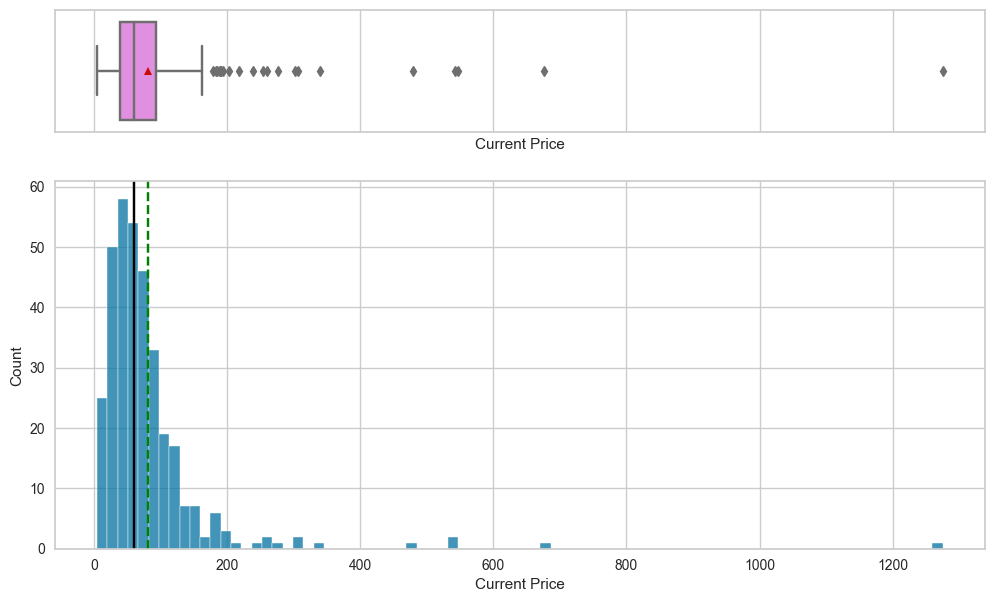

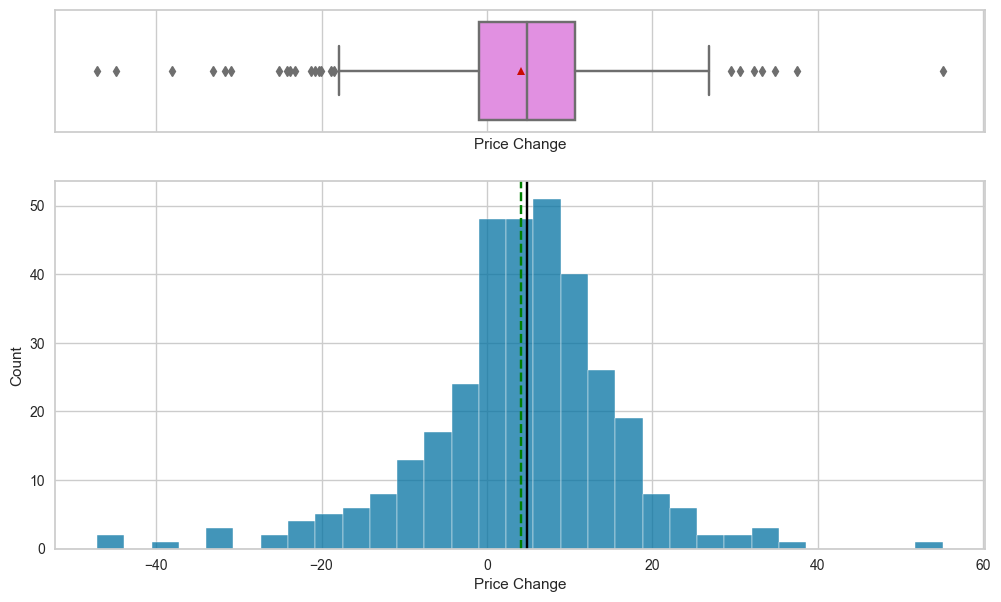

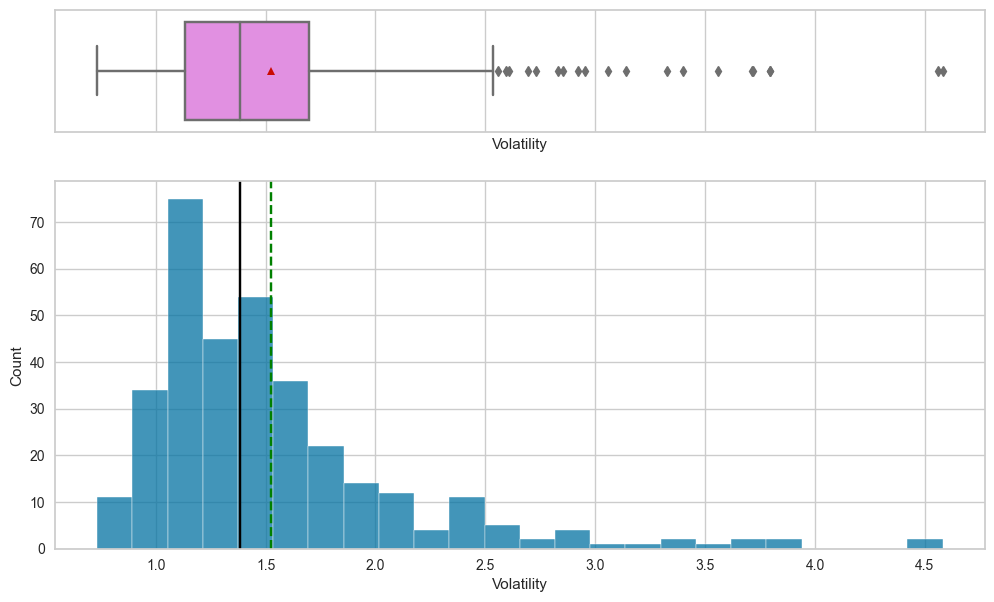

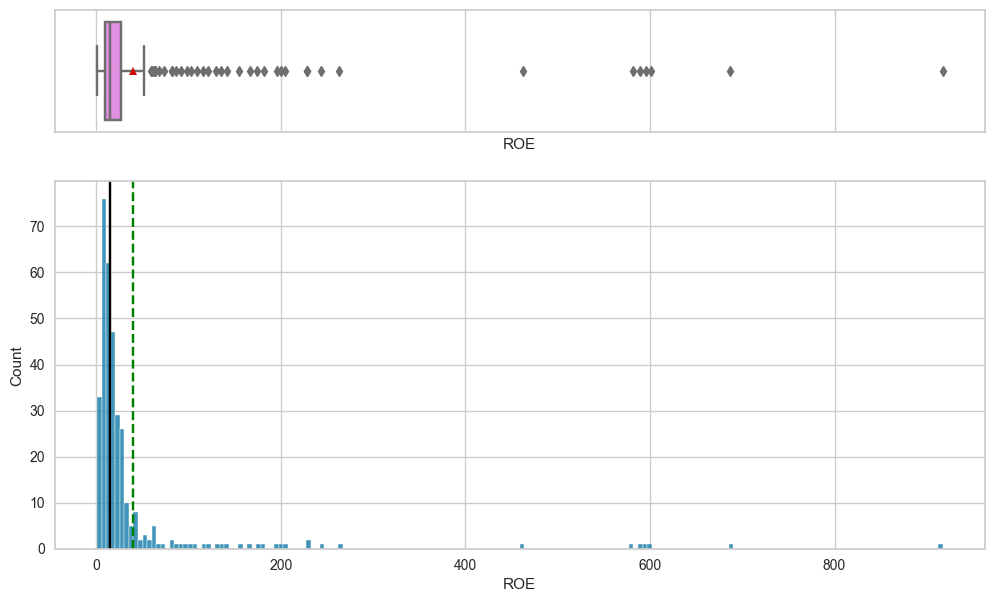

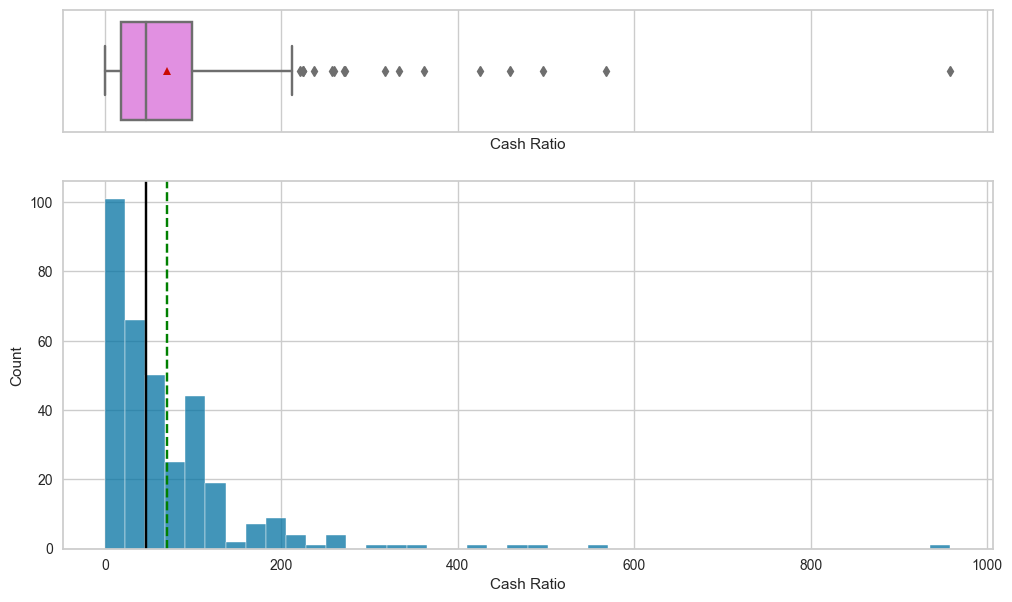

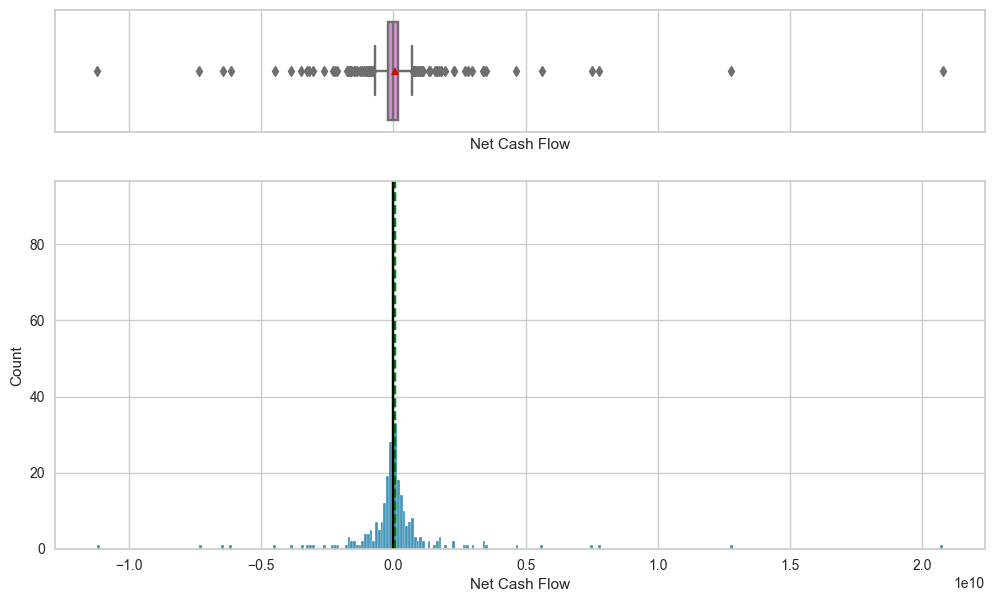

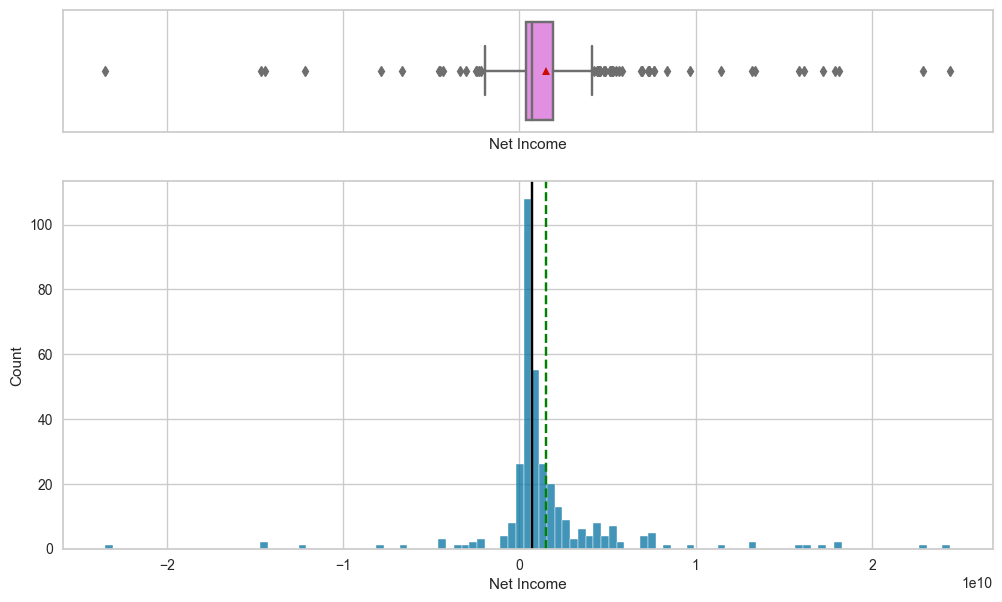

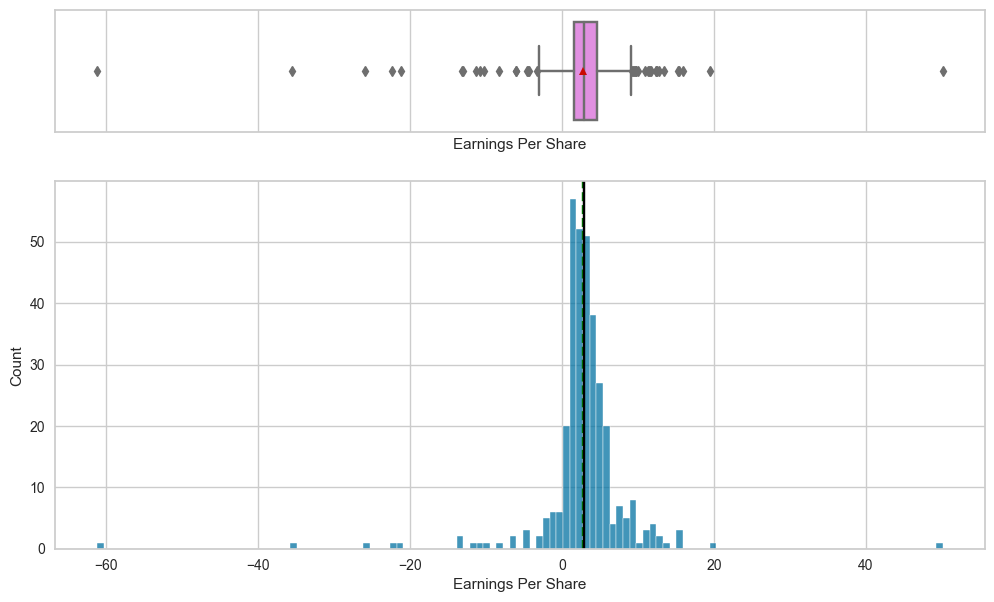

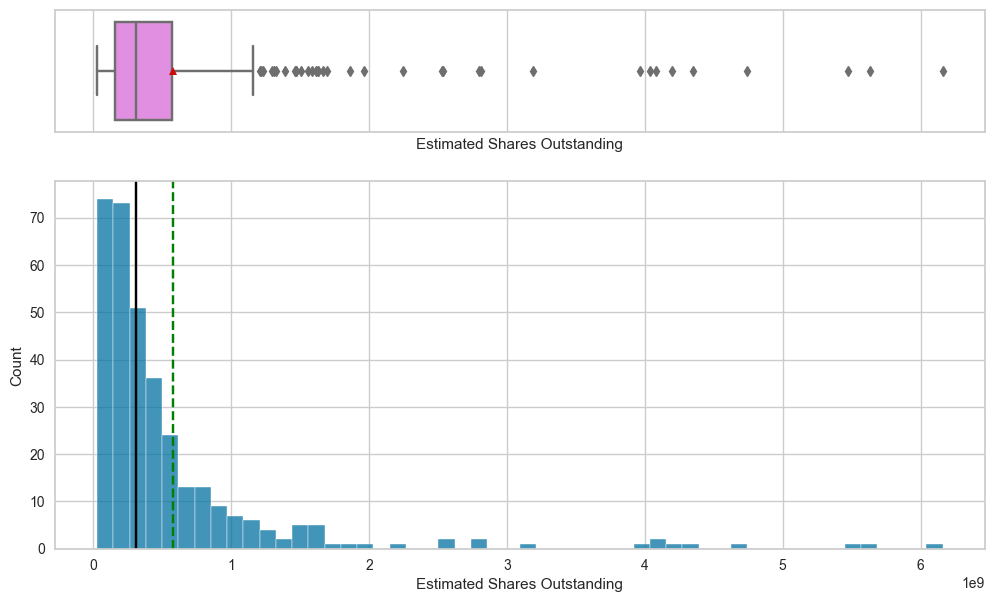

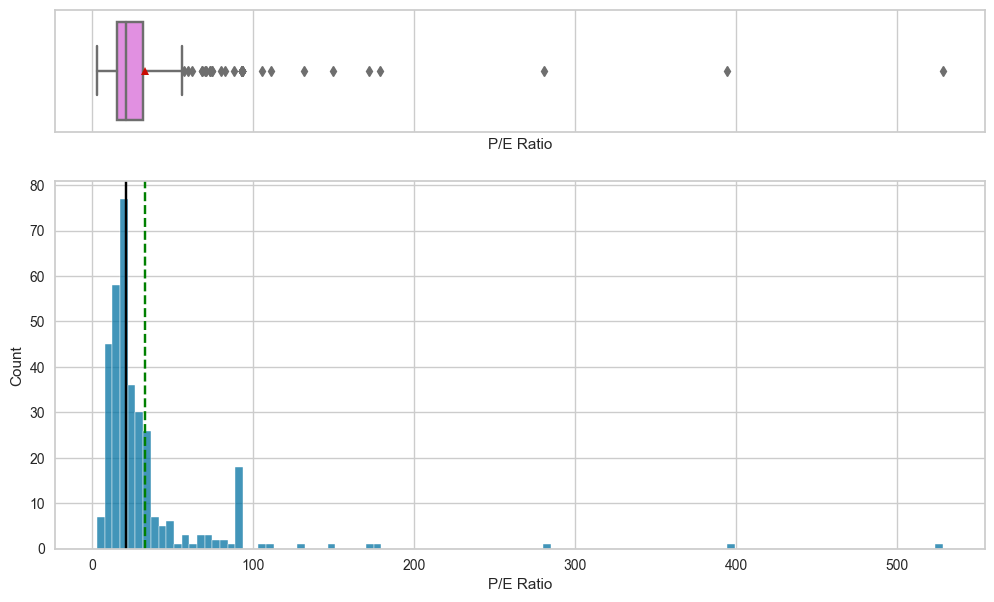

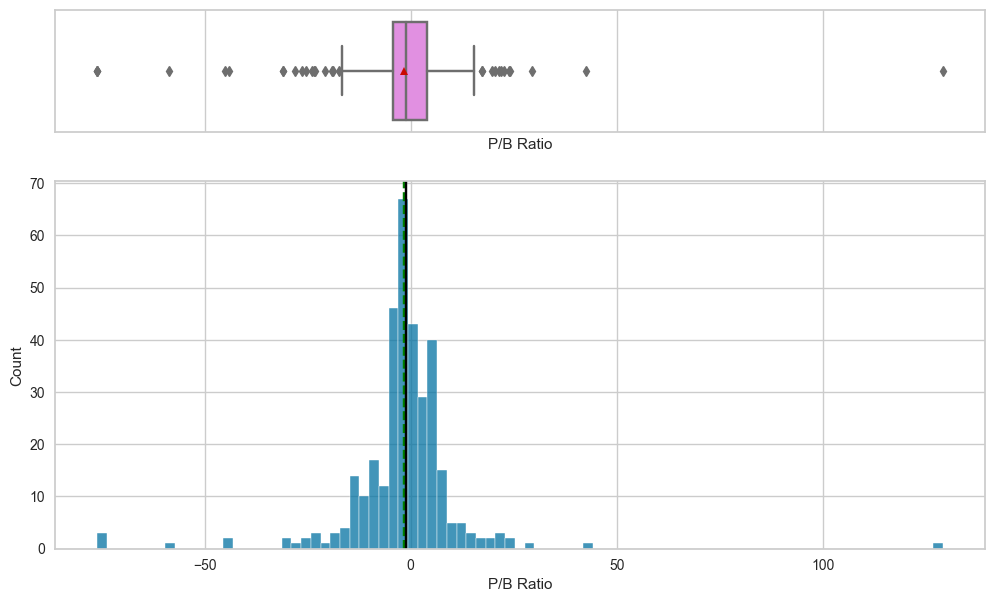

In [13]:
# Selecting numerical columns
num_col = df.select_dtypes(include='number').columns.tolist()

# Calling histogram_boxplot function for all items in num_col list
for item in num_col:
    histogram_boxplot(df, item)

#### Observations

Current Price
* The distribution is heavily right-skewed and very few company stocks have a price of more than $200.

Price Change
* The distribution is approximately normal.

Volatility
* The distribution is right-skewed and few company stocks show high volatility (standard deviation) over 3.5 for the last 13 weeks.

ROE
* The distribution is right-skewed with outliers and few companies have an ROE of 100 or more.

Cash Ratio
* The distribution is right-skewed with outliers and few companies have a cash raio of more than 200. 

Net Cash Flow
* The distribution is approximately normal with many outliers. Many companies hover close to 0, signifying their cash outflow (spending) is even with their cash inflow (earning).

Net Income
* The distribution is approximately normal with outliers. Many companies hover close to 0, signifying their net income of revenue minus expenses, interest, and taxes breaks even. 

Earnings Per Share
* The dsitribution is approximately normal to slightly left-skewed with outliers. The majority of companies did not incur a loss per share. 

Estimated Share Outstanding 
* The distribution is right-skewed with outliers. 

P/E Ratio
* The distribution is right-skewed with outliers and few companies have a P/E ration greater than 100.

P/B Ratio
* The dsitribution is approximately normal with outliers. 

In [14]:
# Function to create labeled barplot

def labeled_barplot(df, feature, perc=False, n=None):
 
    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### GICS Sector

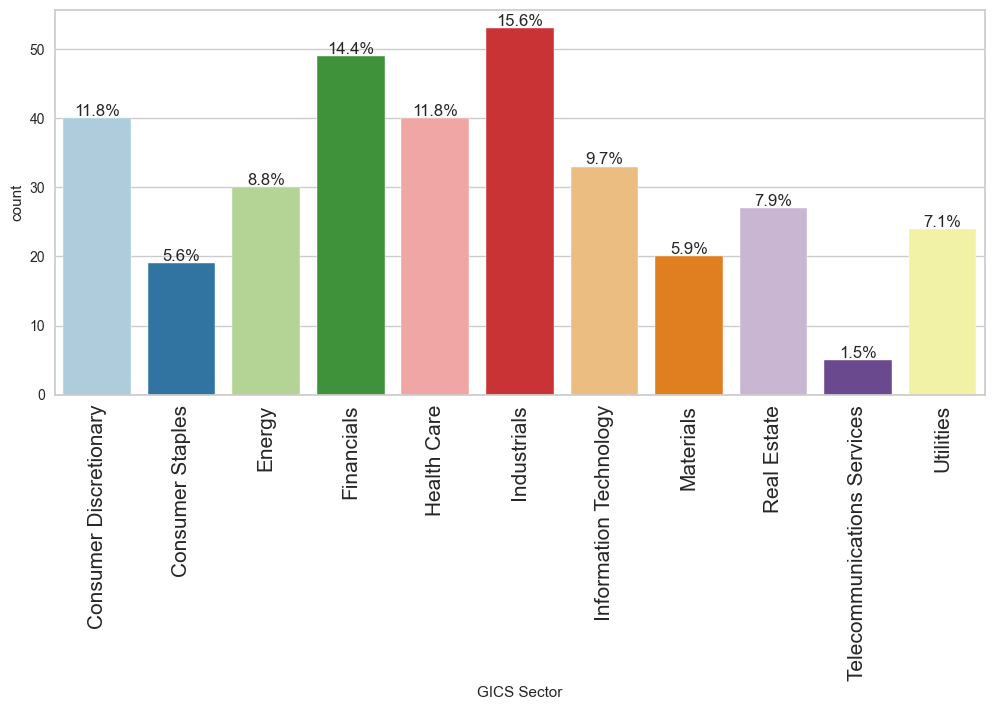

In [15]:
# Call fumction on GICS Sector
labeled_barplot(df, 'GICS Sector', perc=True)

#### Observations
* Most companies are in the Financials or Industrials sectors. These sectors account for 30% of the data.
* Telecommunication Services only represents 1.5% of the data.

### GICS Sub Industry

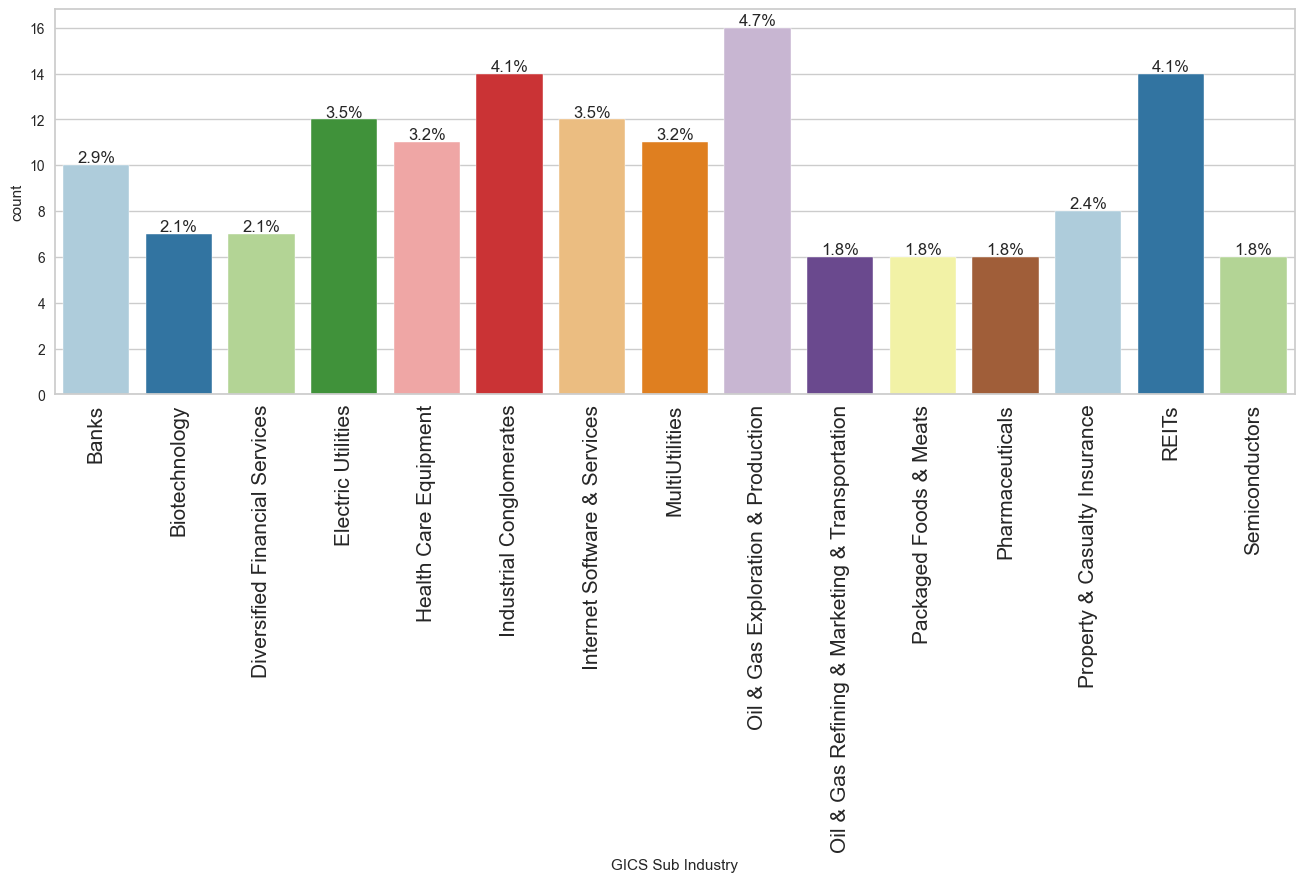

In [16]:
# Call function on Sub Industry
labeled_barplot(df, 'GICS Sub Industry', perc=True, n=15)

#### Observations
* Oil & Gas Exploration & Production, REITs, and Industrial Conglomerates comprise the highest number of companies.

### Bivariate Analysis

**How are the different variables correlated with each other?**

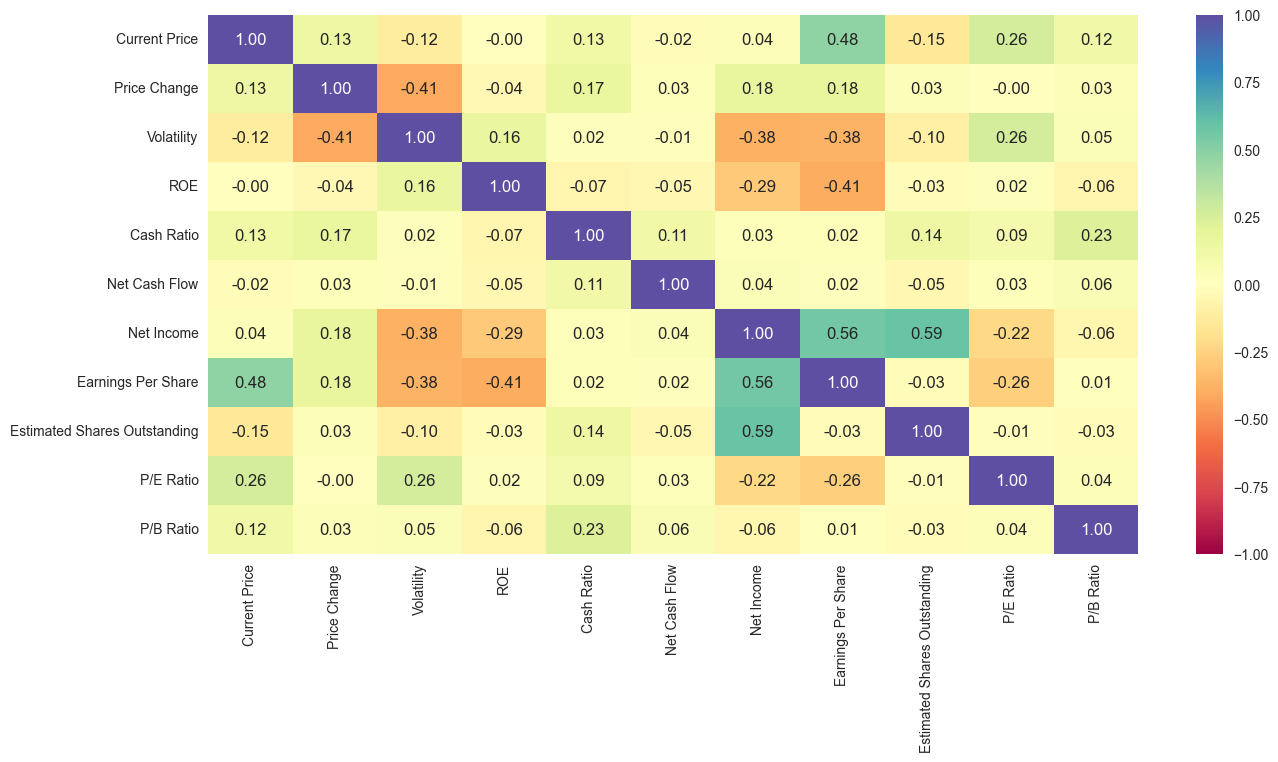

In [17]:
# Select numerical columns
numerical_columns = df.select_dtypes(include='number')

# Check correlation
plt.figure(figsize=(15, 7))
sns.heatmap(
    numerical_columns.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()


#### Observations 

* Net income shows a moderately positive correlation with Earnings Per Share and Estimated Shares Outstanding. 
    * The higher a company's revenue per share, the more a company will bring in compared to expenses, increasing net income. 
    * The higher a company's net income and share potential, the more investors take interest in shares, increasing ESO. 


* Net income is negatively correlated to Volatility and ROE.
* Volatility is negatively correlated to Price Change. 
* Net income and Earnings Per Share are negatively correlated to Volatility.

**Which economic sector have seen the maximum price increase on average?**

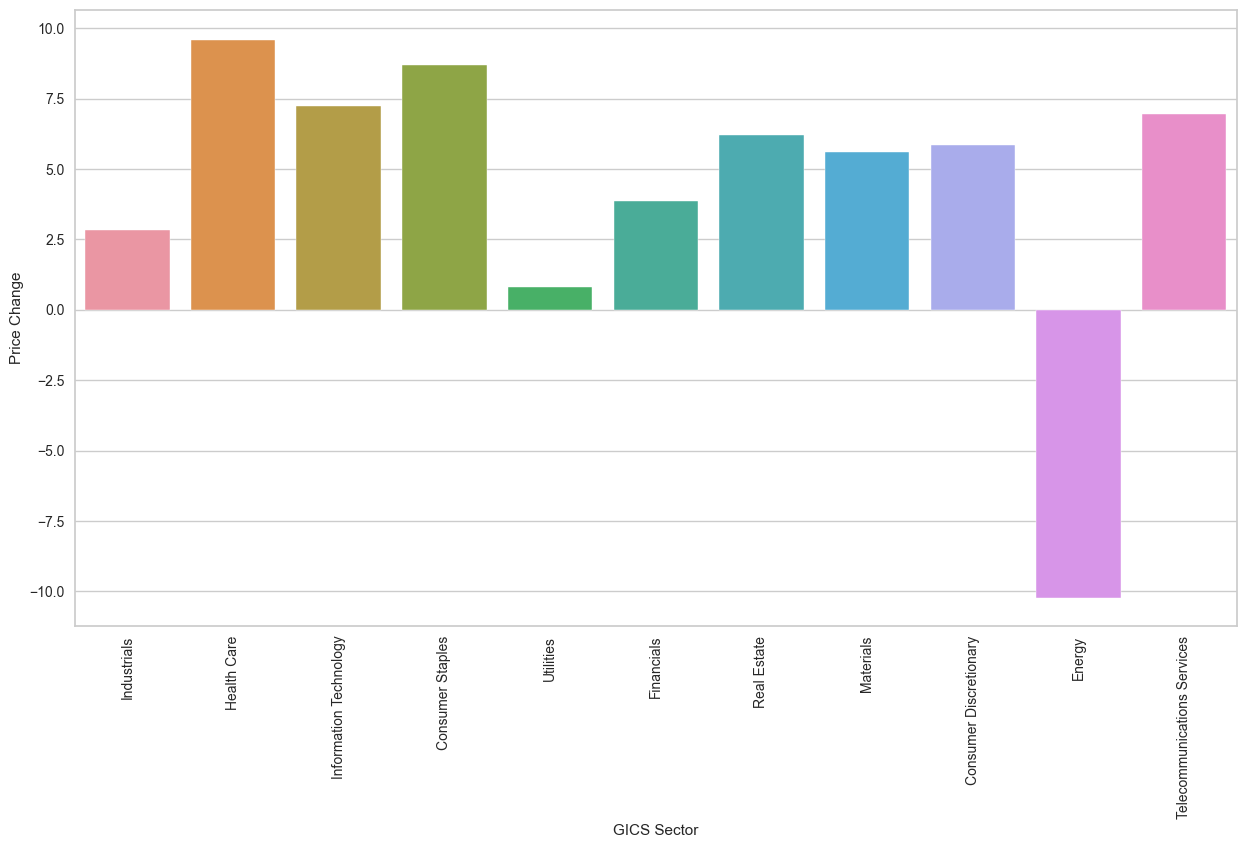

In [18]:
# Draw barplot for Sector and Price Change
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)
plt.xticks(rotation=90)
plt.show()

#### Observations
* The health care sector has seen the highest price increase on average, with approximately 9% increase. 
* Stocks in the energy sector expereinced a drop at approximately -11%.

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?**

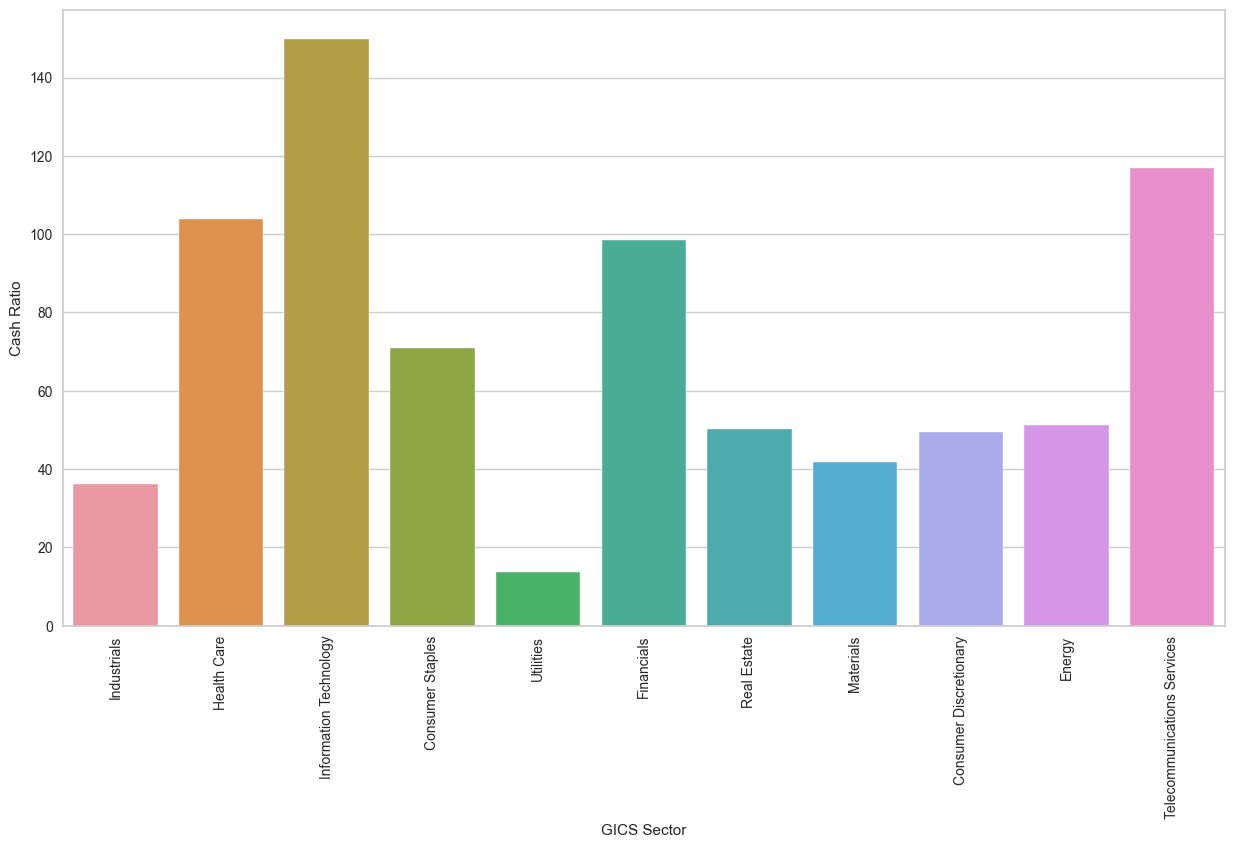

In [19]:
# Draw barplot for Sector and Cash Ratio
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

#### Observations
* Information technology sector has the highest cash ratio, meaning they are more likely to cover short-term obligations using cash or cash equivalents.
* The utilities sector has the lowest cash ratio. Companies in this sector are less likely to be able to cover short-term obligations with cash or equivalents.

**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?**

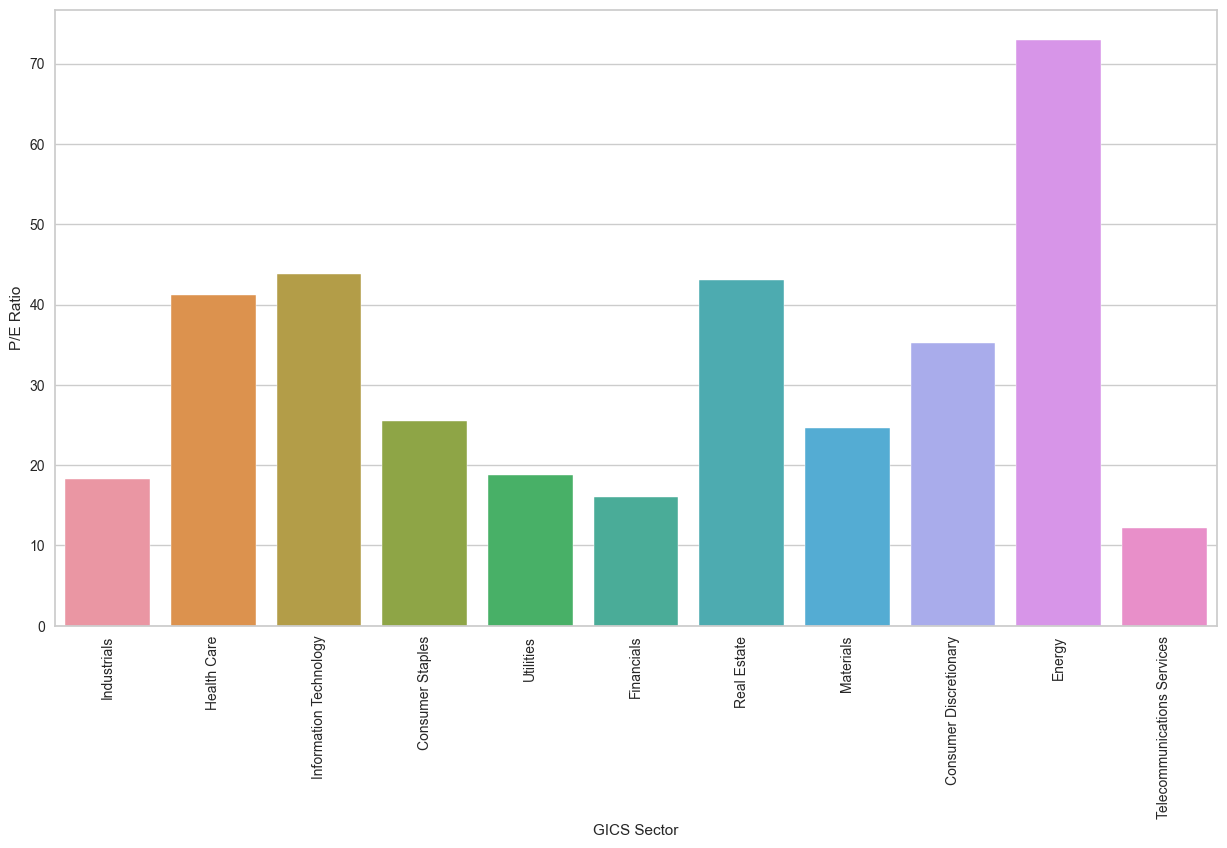

In [20]:
# Draw barplot for Secotr and P/E Ratio
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

#### Observations
* The PE/ Ratio is highest in the Energy sector and lowest for the Telecommunications sector.

**Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.**

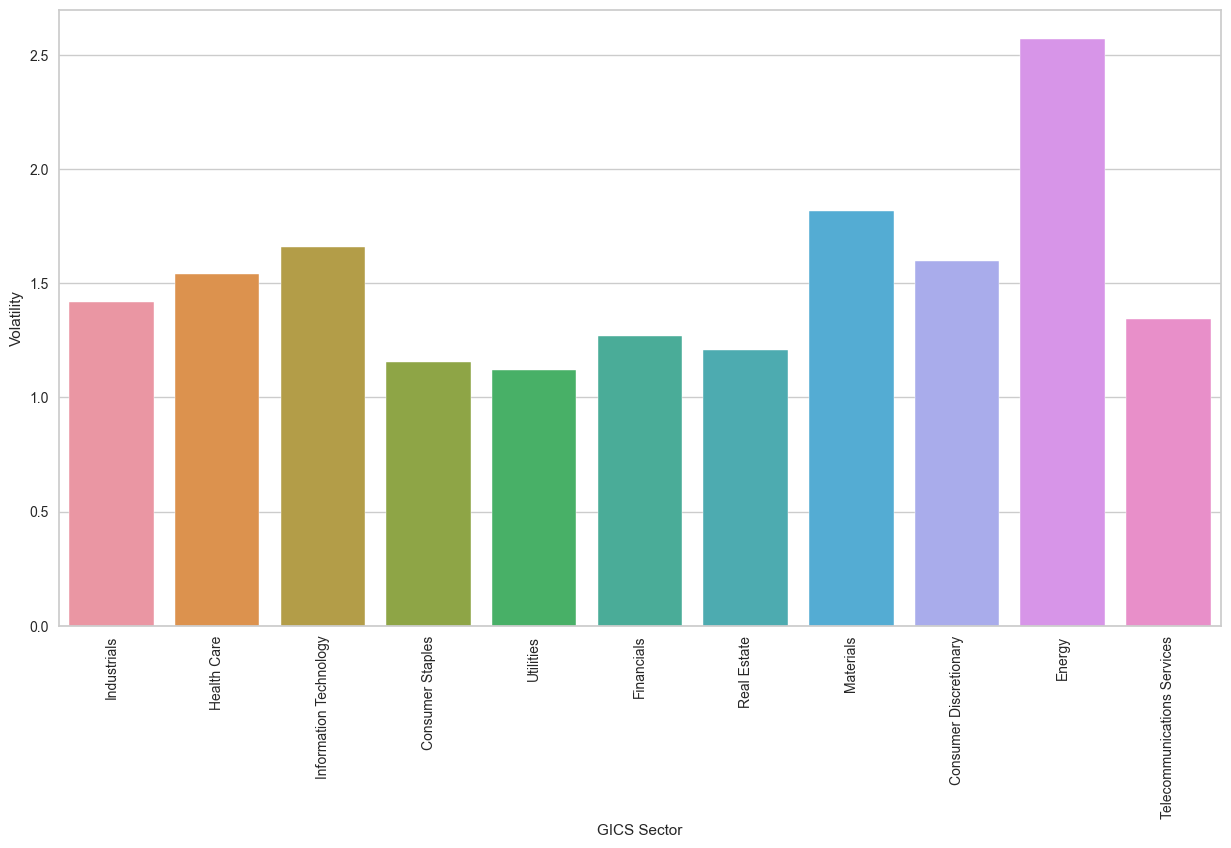

In [21]:
# Draw barplot for Sector and Volatility
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)
plt.xticks(rotation=90)
plt.show()

#### Observations 
* The energy sector experiences the highest volatitlity, making stocks in this industry a riskier investment. 
* Stocks in the Ultilities and COnsumer Staplkes sectors are the least risky investments.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [22]:
# Check for duplicate values in the data
df.duplicated().sum()

0

#### Observations

* There are no duplicate values in the data set. 

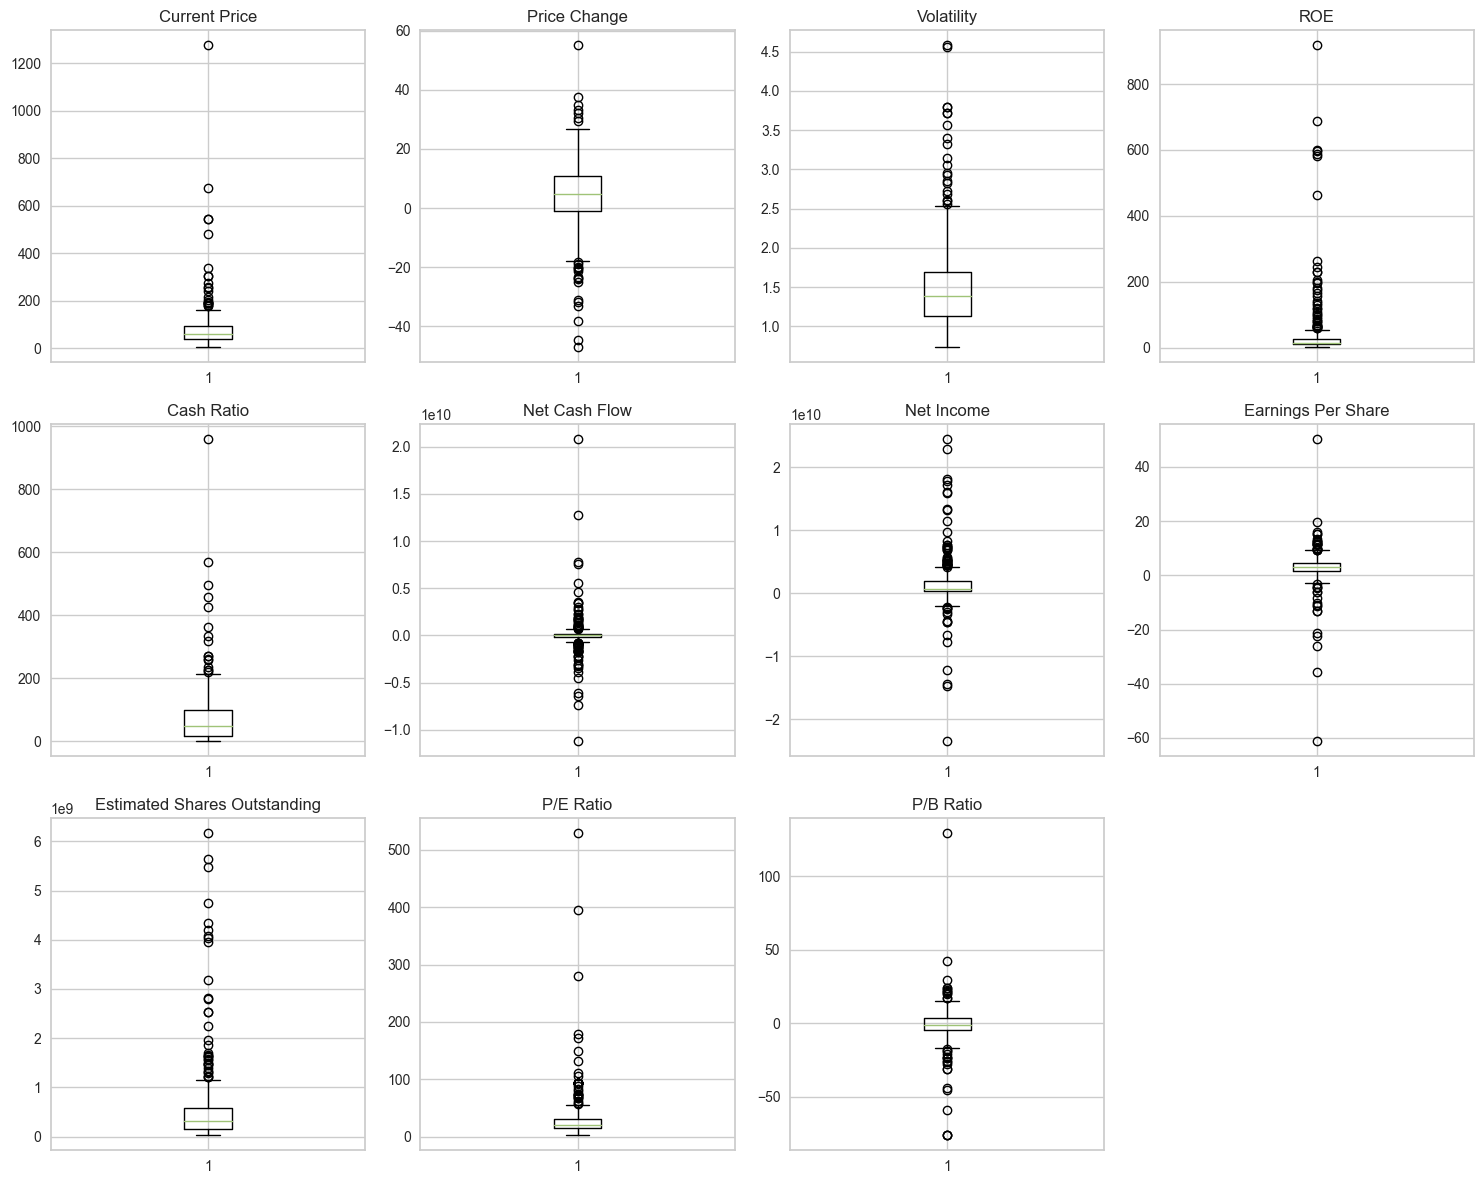

In [23]:
# Fumction to draw boxplots
plt.figure(figsize=(15, 12))

# Create list of numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observations

* There are outliers in the data set. 
* The outliers are proper values. We will not treat them. 

In [24]:
# Variables for clustering
num_col

['Current Price',
 'Price Change',
 'Volatility',
 'ROE',
 'Cash Ratio',
 'Net Cash Flow',
 'Net Income',
 'Earnings Per Share',
 'Estimated Shares Outstanding',
 'P/E Ratio',
 'P/B Ratio']

In [25]:
# Scale data set
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

# Create dataframe of scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

# Output first 5 rows of scaled data set
subset_scaled_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


In [26]:
# Statistical summary of numerical columns of the scaled data
subset_scaled_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,7.836868e-18,1.001474,-0.779918,-0.432101,-0.216088,0.122741,12.195670
Price Change,340.0,-2.873518e-17,1.001474,-4.271357,-0.418535,0.061834,0.551963,4.251806
Volatility,340.0,-7.967483e-17,1.001474,-1.341642,-0.661838,-0.237564,0.286960,5.168258
ROE,340.0,2.873518e-17,1.001474,-0.400362,-0.309599,-0.255142,-0.130667,9.101176
Cash Ratio,340.0,-8.098097e-17,1.001474,-0.775555,-0.576194,-0.255000,0.320933,9.834905
Net Cash Flow,340.0,2.612289e-18,1.001474,-5.795489,-0.128348,-0.027497,0.058798,10.655237
Net Income,340.0,1.044916e-17,1.001474,-6.359977,-0.290285,-0.200045,0.102842,5.832629
Earnings Per Share,340.0,5.747037e-17,1.001474,-9.725729,-0.185337,0.017990,0.280224,7.192572
Estimated Shares Outstanding,340.0,-1.044916e-16,1.001474,-0.650430,-0.495119,-0.316542,-0.004630,6.609320
P/E Ratio,340.0,7.836868e-18,1.001474,-0.670162,-0.396715,-0.266300,-0.019145,11.187619


#### Observations

* The standard deviations of all columns are now the same. 


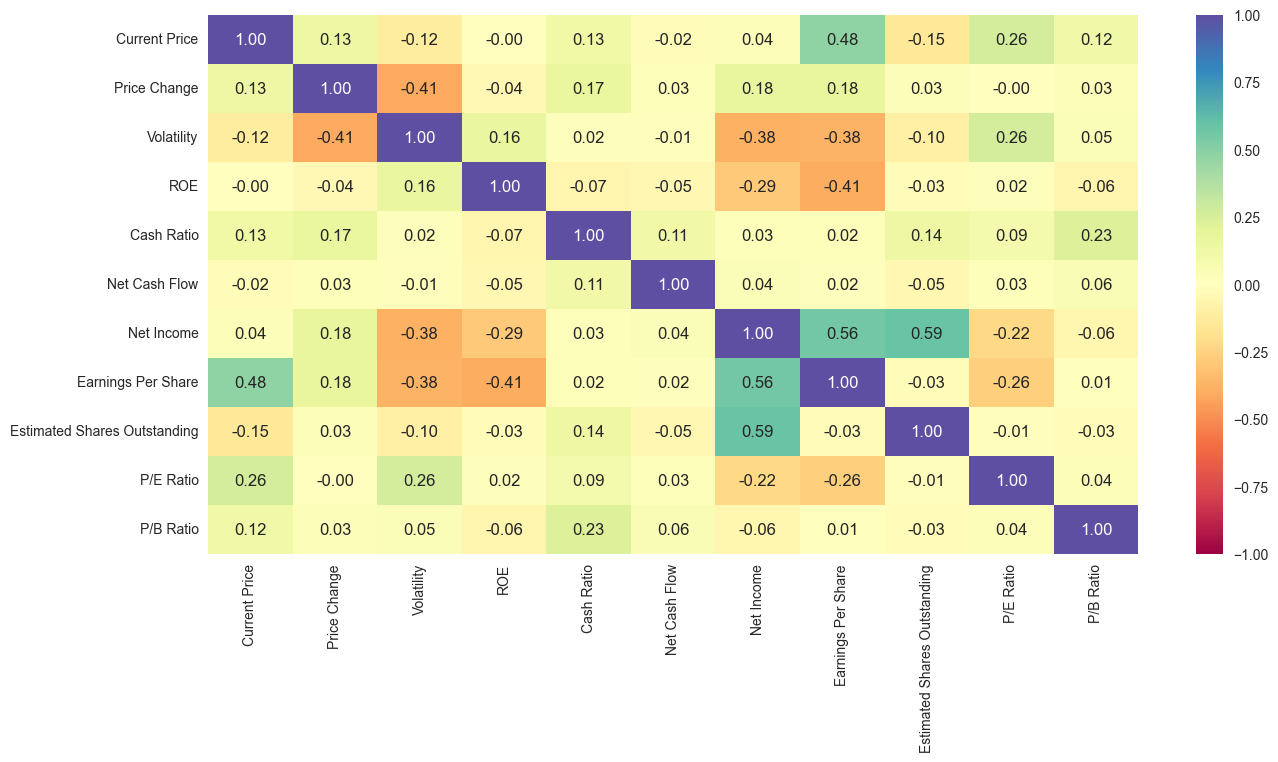

In [27]:
# Correlation check for scaled data
plt.figure(figsize=(15, 7))
sns.heatmap(
    subset_scaled_df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations 

The correlating values are similar to the unscaled data set.

* Net income still shows a positive correlation with Earnings Per Share and Estimated Shares Outstanding.     
* Net income is still negatively correlated to Volatility and ROE.
* Volatility is still negatively correlated to Price Change and Earnings Per Share. 


## K-means Clustering

In [28]:
# Copy scaled data frame
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


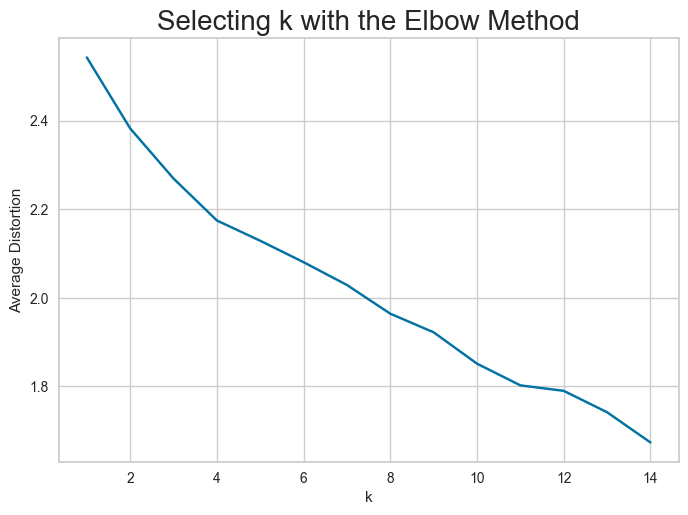

In [29]:
# Define the range of clusters to consider
clusters = range(1, 15)

# Create an empty list to store the average distortions
meanDistortions = []

# Iterate over each value of k in the clusters range
for k in clusters:
    # Create a KMeans model with k clusters
    model = KMeans(n_clusters=k, random_state=1)
    
    # Fit the model to the scaled subset of the data
    model.fit(subset_scaled_df)
    
    # Predict the cluster labels for the original data
    prediction = model.predict(k_means_df)
    
    # Calculate the distortion (average distance of samples to their nearest cluster center)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )
    
    # Append the distortion to the meanDistortions list
    meanDistortions.append(distortion)
    
    # Print the number of clusters and the average distortion for the current iteration
    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

# Plot the average distortions for each value of k
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

#### Observations

* The appropriate value for k seems to be approximately 6.

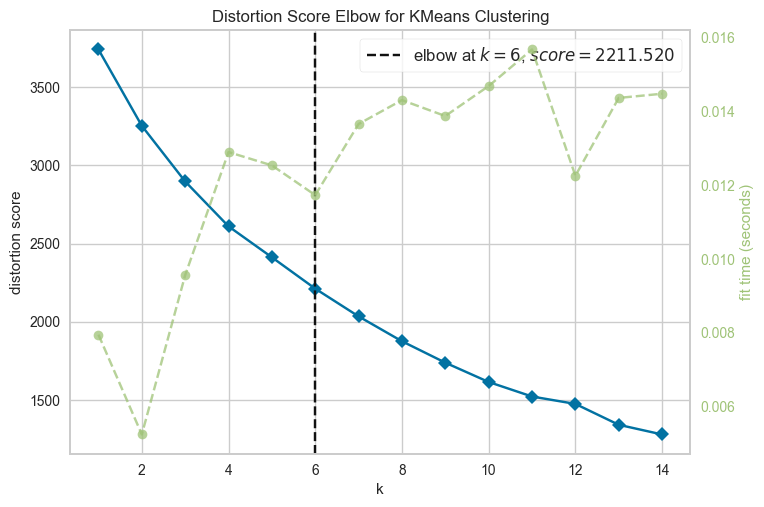

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
# Create a KMeans model with a random state of 1
model = KMeans(random_state=1)

# Create a KElbowVisualizer object with k values ranging from 1 to 15
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)

# Fit the KElbowVisualizer to the data
visualizer.fit(k_means_df)

# Finalize and render the figure
visualizer.show()

#### Observations

* The previous observations were correct. The K-means elbow is at k=6, indicating that increasing the number of clusters beyond 6 will no longer significantly decrease the distortion score which is 2211.52 at k=6. 

For n_clusters = 2, the silhouette score is 0.43969639509980457
For n_clusters = 3, the silhouette score is 0.4644405674779404
For n_clusters = 4, the silhouette score is 0.4577225970476733
For n_clusters = 5, the silhouette score is 0.43228336443659804
For n_clusters = 6, the silhouette score is 0.4005422737213617
For n_clusters = 7, the silhouette score is 0.3976335364987305
For n_clusters = 8, the silhouette score is 0.40278401969450467
For n_clusters = 9, the silhouette score is 0.3778585981433699
For n_clusters = 10, the silhouette score is 0.13458938329968687
For n_clusters = 11, the silhouette score is 0.1421832155528444
For n_clusters = 12, the silhouette score is 0.2044669621527429
For n_clusters = 13, the silhouette score is 0.23424874810104204
For n_clusters = 14, the silhouette score is 0.12102526472829901


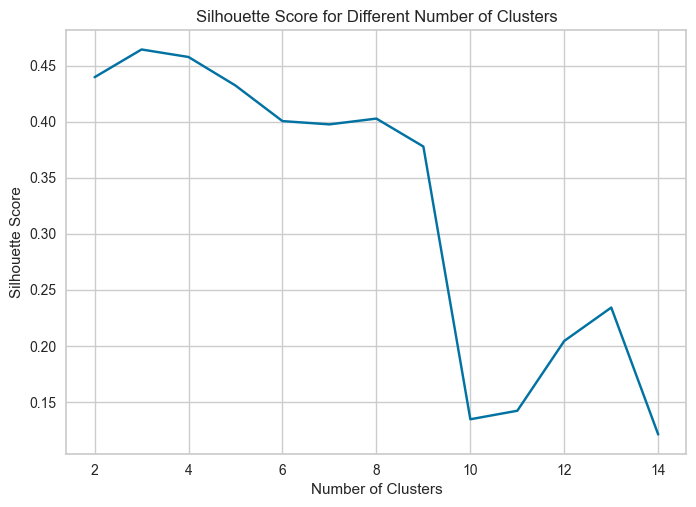

In [31]:
sil_score = []  # List to store silhouette scores
cluster_list = range(2, 15)  # Range of cluster numbers to consider

# Iterate over each value of n_clusters in cluster_list
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)  # Create a KMeans clusterer with n_clusters
    preds = clusterer.fit_predict(subset_scaled_df)  # Fit the clusterer and obtain cluster labels
    score = silhouette_score(k_means_df, preds)  # Calculate the silhouette score
    sil_score.append(score)  # Append the score to the sil_score list
    print("For n_clusters = {}, the silhouette score is {}".format(n_clusters, score))

# Plot the silhouette scores against the number of clusters
plt.plot(cluster_list, sil_score)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Number of Clusters")
plt.show()

#### Observations

* The previous observations at k=6 aligns with the silhouette scores. The scores gradually decrease after 6 clusters, suggesting additional clusters do not provide significant improvements in data point separation. 

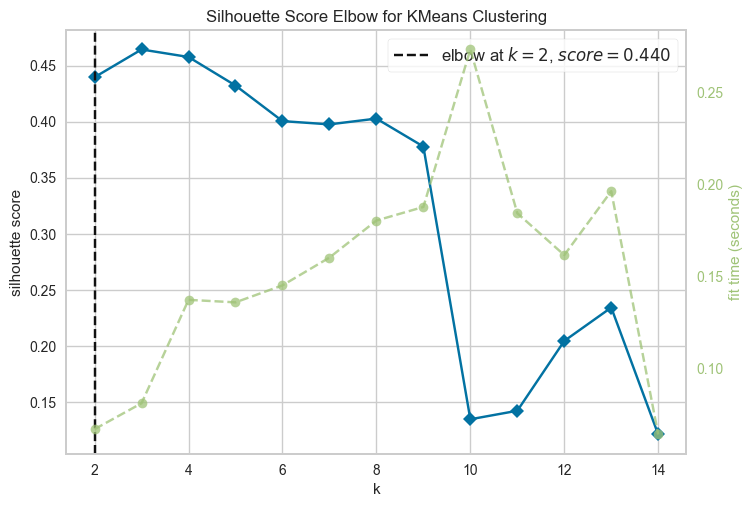

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [32]:
# Create a KMeans model with a random state of 1
model = KMeans(random_state=1)  
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)  # Create a KElbowVisualizer with silhouette metric
visualizer.fit(k_means_df)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure


#### Observations

* The plot shows the Silhouette score is actually highest at k=2 with a score of 0.440.
* While the previous analysis indicated k=6 was optimal, the sllhouette score evaluation shows that dividing the data into two clusters results in more defined and distinct clusters.

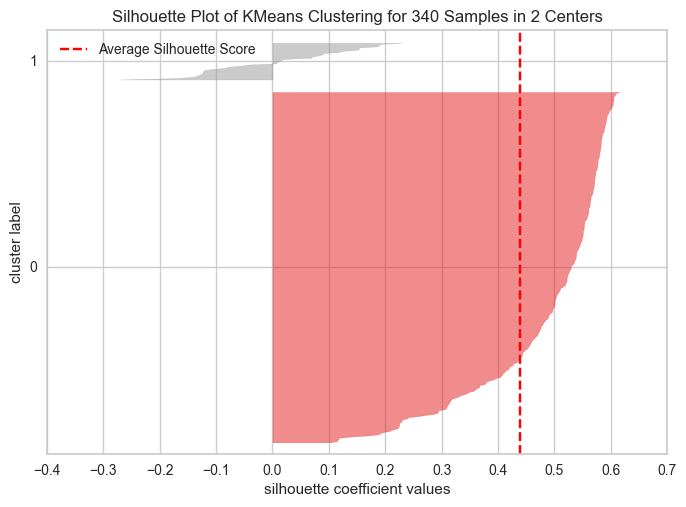

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [33]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

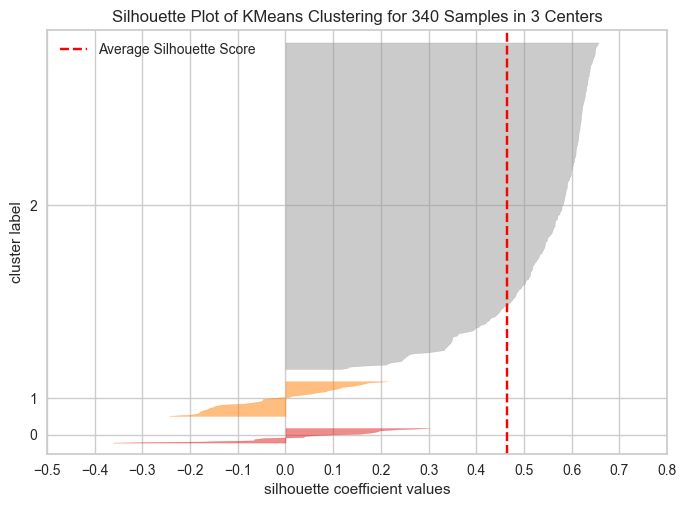

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [34]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

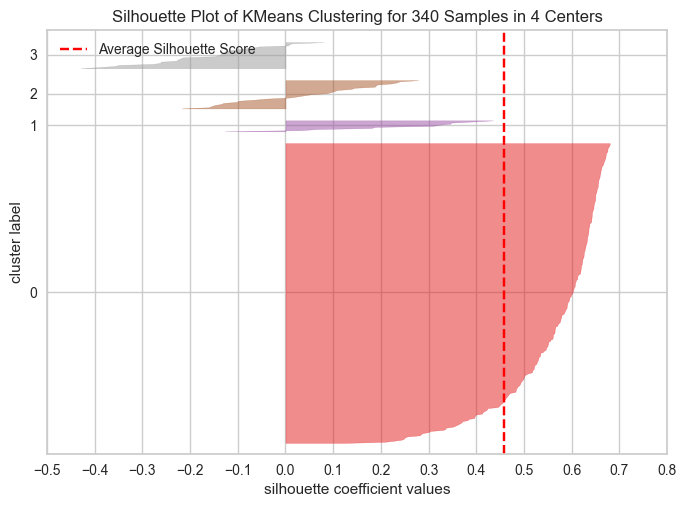

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [35]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

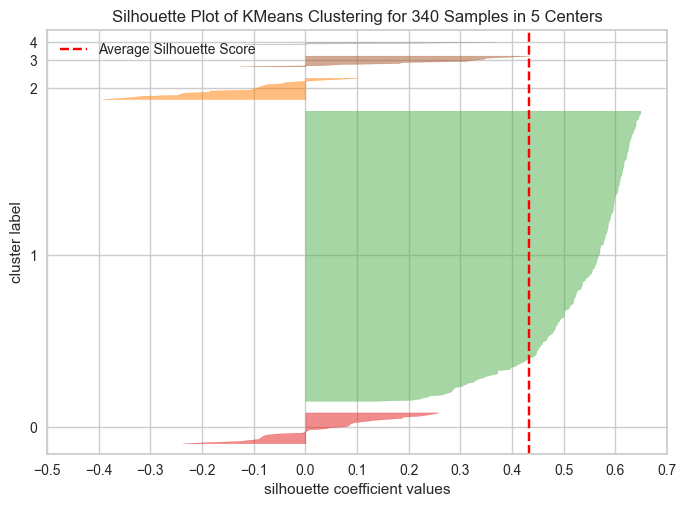

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [36]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

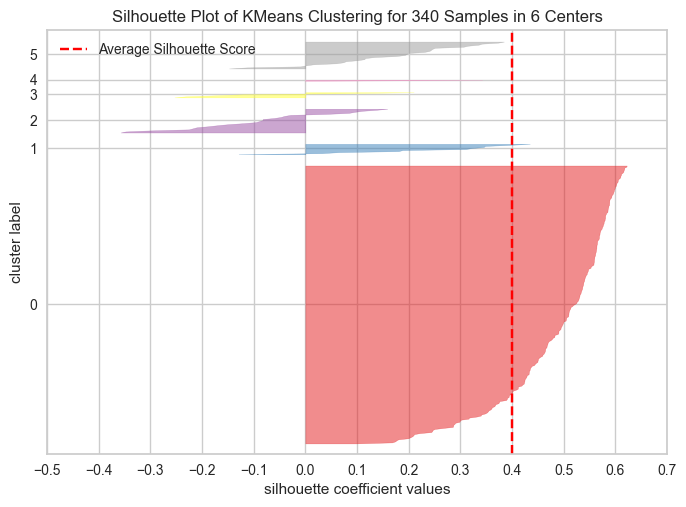

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [37]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

#### Observations 
* Our previous analysis noted that k=2 and k=6 provided optimal silhoutte scores. 
* However, the plots further show k=2,3,4,&5 are suboptimal. They all feature clusters with below average sillhoutte scores and wide flucuations in the size of the silhouette plots. 
* At k=6, the clusters show approximately average scores. 

In [38]:
# Final K-means model
kmeans = KMeans(n_clusters=6, random_state=1)
kmeans.fit(k_means_df)

KMeans(n_clusters=6, random_state=1)

In [39]:
# Creating a copy of the original data
df1 = df.copy()

# Adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

In [40]:
# Select columns of numeric data from df1
numeric_columns = df1.select_dtypes(include=[np.number])

# Group the numeric columns by "KM_segments" and calculate the mean for each segment
km_cluster_profile = numeric_columns.groupby("KM_segments").mean()


In [41]:
# Count the number of occurrences in each segment and add it to km_cluster_profile
km_cluster_profile["count_in_each_segment"] = df1.groupby("KM_segments")["Security"].count().values


In [42]:
# Apply style highlighting to the maximum values in each column of km_cluster_profile
km_cluster_profile.style.highlight_max(color="red", axis=0)


,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,73.854019,5.116180,1.369515,35.262963,50.637037,4512725.925926,1512994744.444444,3.723870,430296731.305963,23.486573,-3.567829,270
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,111.612223,11.789464,1.787972,26.125000,290.083333,1450830291.666667,1499538625.000000,2.993750,700417074.282083,44.575135,13.972648,24
3,557.499989,17.445166,1.714325,12.000000,158.000000,116336500.000000,773142833.333333,12.396667,215235860.658333,225.136796,7.666157,6
4,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
5,34.231808,-15.515565,2.832069,48.037037,47.740741,-128651518.518519,-2444318518.518518,-6.284444,503031539.057037,75.627265,1.655990,27


In [43]:
# Print companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Archer-Daniels-Midland Co' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Activision Blizzard' 'AvalonBay Communities, Inc.'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'CBRE Group'
 'Crown Castle International Corp.' 'Ca

In [44]:
# Group df1 by "KM_segments" and "GICS Sector" count "Security" in each group
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()


KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          5
             Financials                     45
             Health Care                    30
             Industrials                    51
             Information Technology         20
             Materials                      17
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     2
             Information Technology          1
             Telecommunications Services     2
2            Consumer Discretionary          4
             Consumer Staples                1
             Energy

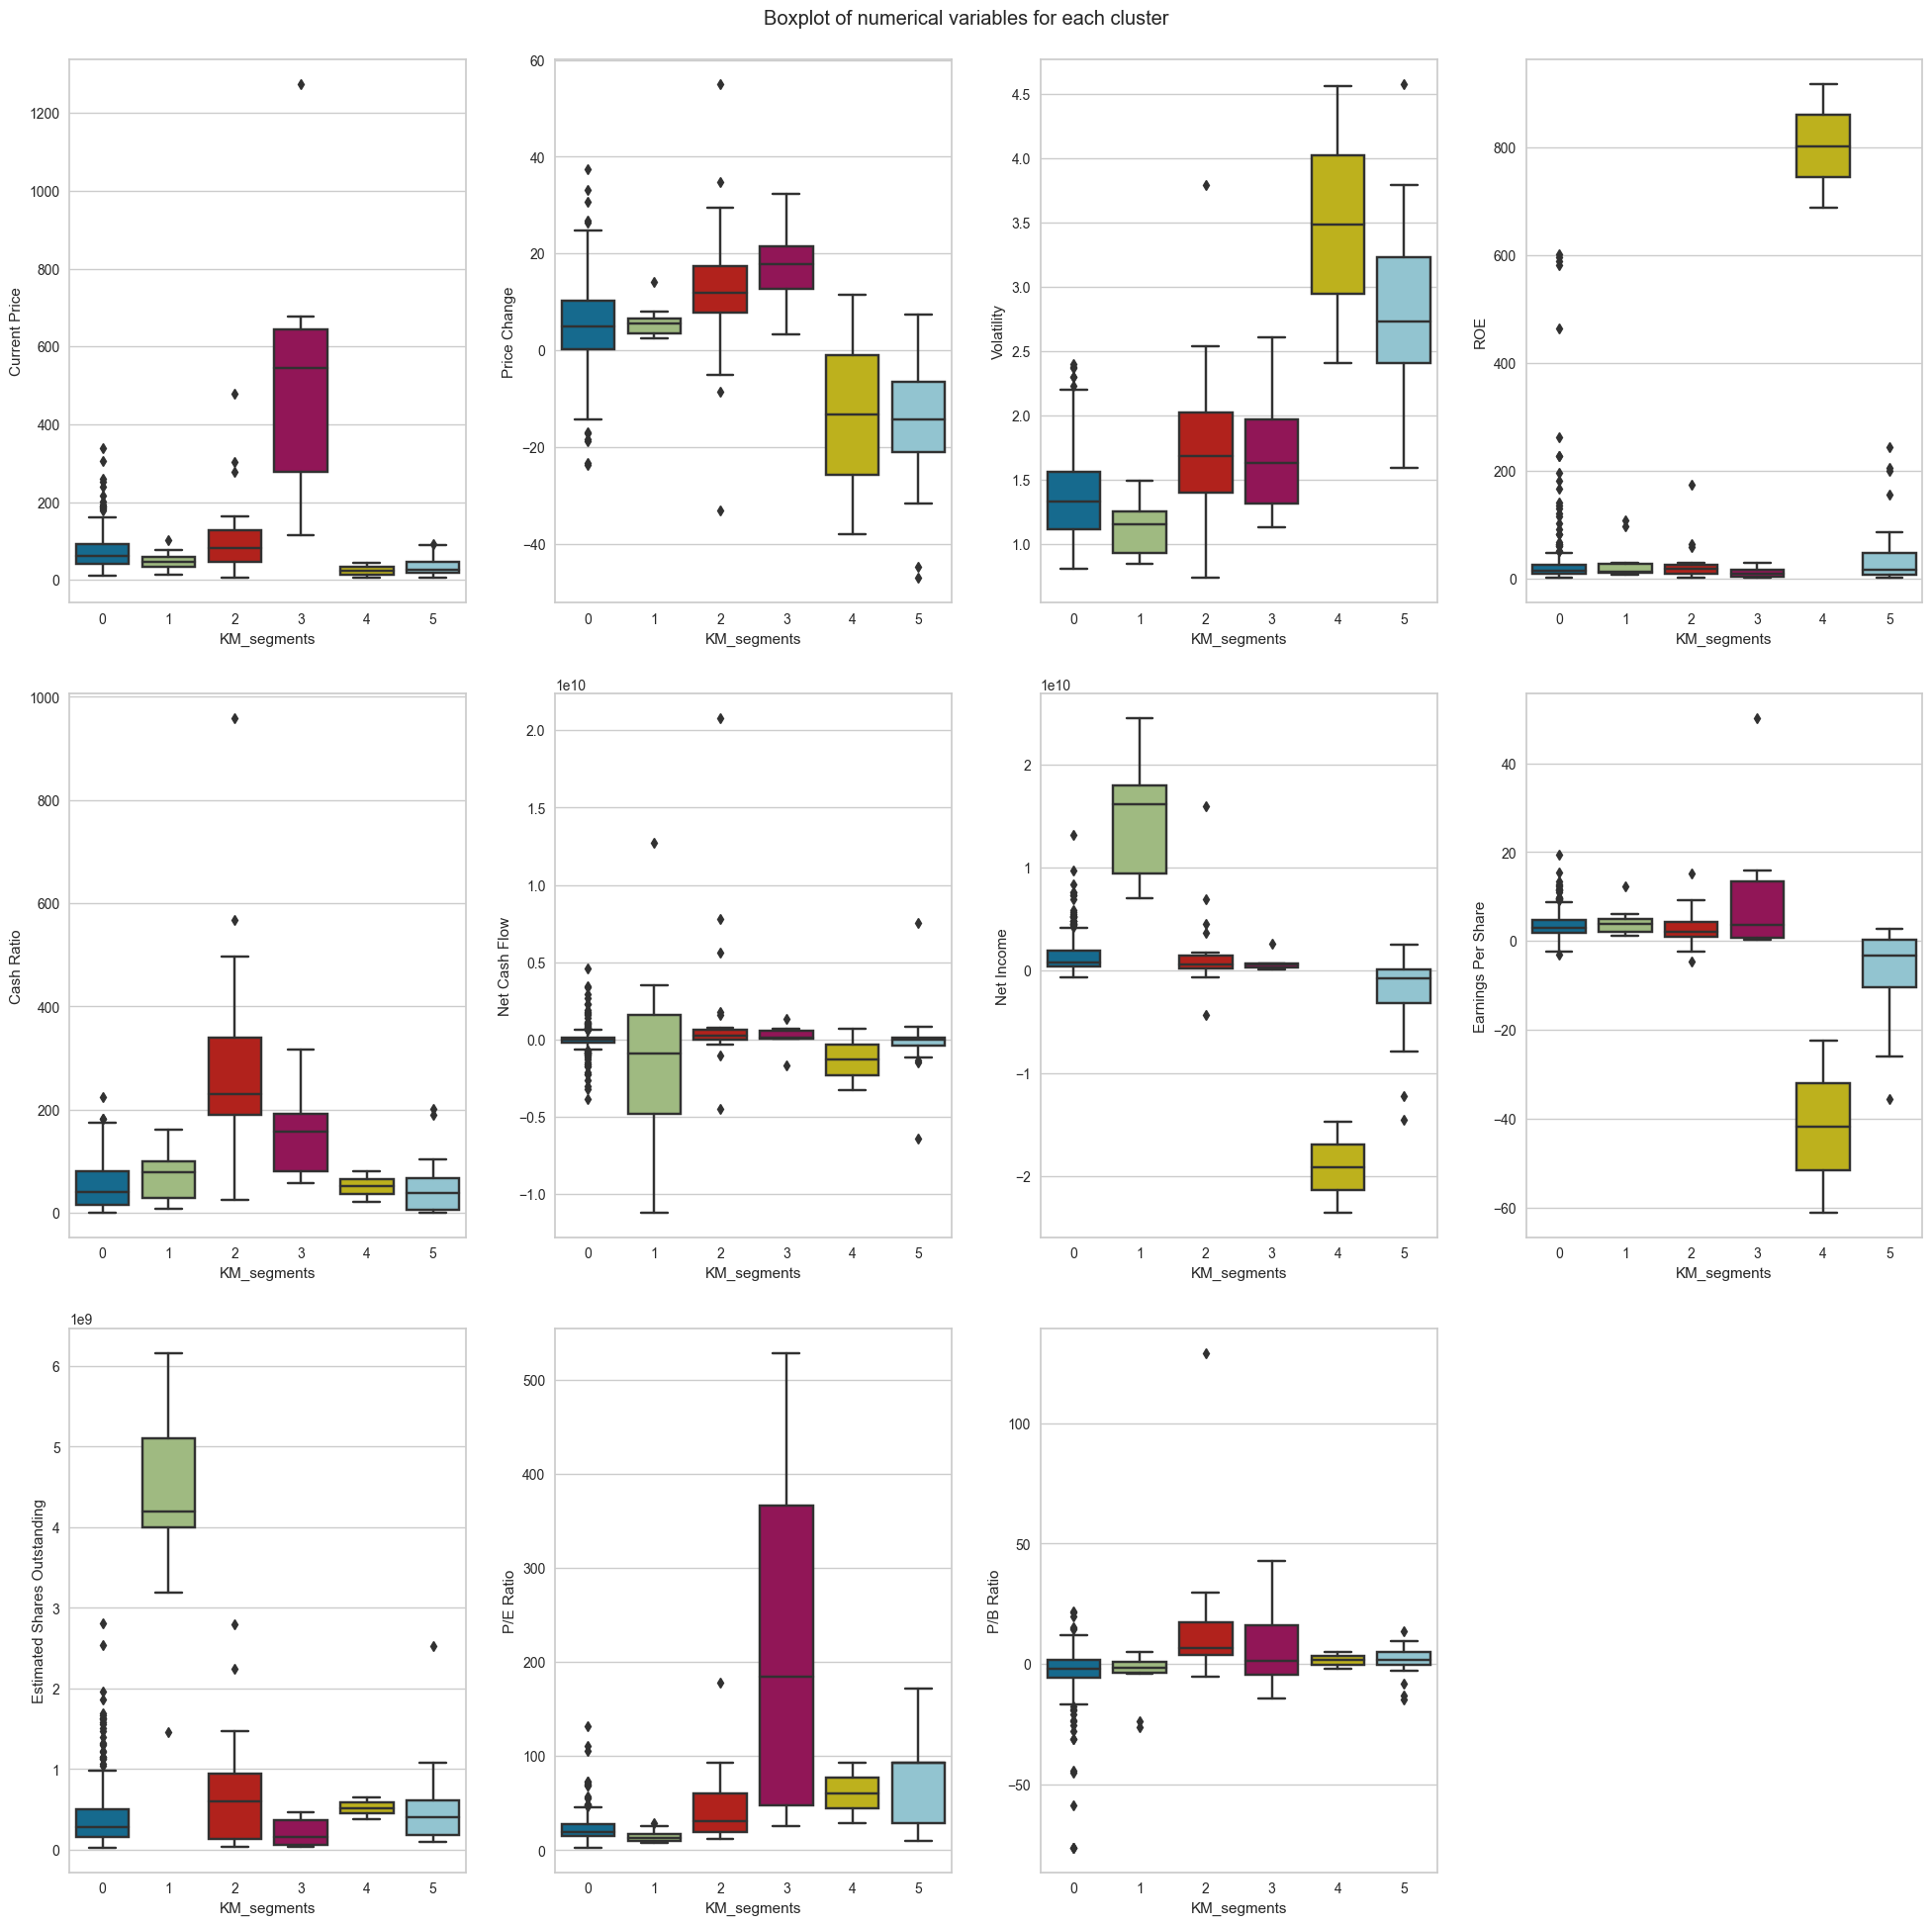

In [45]:
# Set the figure size for the plot
plt.figure(figsize=(20, 20))

# Set the title for the plot
plt.suptitle("Boxplot of numerical variables for each cluster")

# Select the numerical columns from the DataFrame
num_col = df.select_dtypes(include=np.number).columns.tolist()

# Iterate over the numerical columns and create subplots for each variable
for i, variable in enumerate(num_col):
    # Create a subplot with the appropriate position in the grid
    plt.subplot(3, 4, i + 1)
    
    # Plot a boxplot of the variable for each cluster using seaborn
    sns.boxplot(data=df1, x="KM_segments", y=variable)

# Adjust the spacing between subplots for better layout
plt.tight_layout(pad=2.0)


#### Observations 

Cluster 0
* There are 270 companies in this cluster, with the majority coming from the Industrials, Financials, and Consumer Discretionary sectors.
* This cluster contains the highest count resulting in even distribution and no maximum values. 
* The volatility in this cluster is relatively low, indicating relatively reliable stocks. This is further seen with the positive price change of $5.12, indicating an increase in value and a 35.26% ROE, indicating profitability. 
* Companies in this segment have a Cash Ratio of 50.64%, indicating healthy cash reserves compared to liabilities. 

Cluster 1
* There are 6 companies in this cluster from the Consumer Discretionary, Health Care, and IT sectors. 
* This cluster has maximum values in several columns: Current Price, Earnings Per Share, P/E Ratio, and P/B Ratio.
* The maximum current price is $633 with a positive price change, while the ROE at 19.33% suggests profitability. 
* This cluster has the maximum Earnings Per Share at $16.27, and it has the highest P/E Ratio at 123.05, suggesting investors will pay a premium for the stocks.
* The max P/B Ratio of 35.36 indicates the stocks are trading about book value. 

Cluster 2
* There are 11 companies in this cluster representing 7 unique sectors. 
* This cluster has maximum values in the Net Income and Estimated Shares Outstanding columns. 
* The positive price change and relatively low volatility indicate stable, appreciating stokcs. 
* The max net income of $14.8 billion indicates profitability. 
* This cluster has a negative P/B Ratio, indicating the stocks are trading below book value.

Cluster 3
* There are only 2 companies in this sector, which explains the findings relating to volatility. The comapnies are Apache Coproation and Chesapeke Energy in the Energy sector. The Energy sector has a history of high volatility and profitability. It is highly linked to geopolitical events and tensions, regulatory changes, supply and demand, tech advancements, and macroeconomic conditions. 
* This cluster has maximum values in the Volatility and ROE columns. 
* The current price is low with a negative price change, indicating stock price decline. 
* The max volatility is 3.48, suggesting high flucuations in price. 
* The cluster has negative net incomeand negative EPS indicating significant losses. However, the high P/E Ratio suggests investors are valuing the stocks high despite the loss.
* The max ROE of 802% suggests a potentially profitable business. However, the max volatitlty makes it a dangerous one. 

Cluster 4
* There are 23 companies in this cluster with the largest representations being from the IT and Health Care sectors.
* This cluster contains maximum values in the Price Change, Cash Ratio, and Net Cash Flow columns. 
* The relatively high price and high positive price change indicate appreciation, while the max cash ratio of 299.8% indicates significant cash reserves. 
* The maximum net cash flow suggest large profitability from the companies in this cluster. 

Cluster 5
* There are 28 companies in theis sector with 21 companies from the Energy sector. This explains the finding relating to negative price change and negative net income yet high value from investors. The Energy sector is historically volatile, going through ups and downs relating to geopolitics and more, yet is always highly valued. 
* There are no maximum values in this cluster. 
* The low price and negative price change indicant decline. However, the ROE of 47% indicated profitability. 
* The cluster has a negative net income, signifying loss and a negative EPS representing more loss. 
* However, the high P/E Ratio indicates investors value the company highly despite the loss. 

# Hierarchical Clustering

In [46]:
# Create a copy of the scaled dataframe
hc_df = subset_scaled_df.copy()

In [47]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850004.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159734.
Cophenetic correl

In [48]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm
        
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


#### Observations

* The cophenetic  correlation is highest with Euclidean distance and average linkage. 

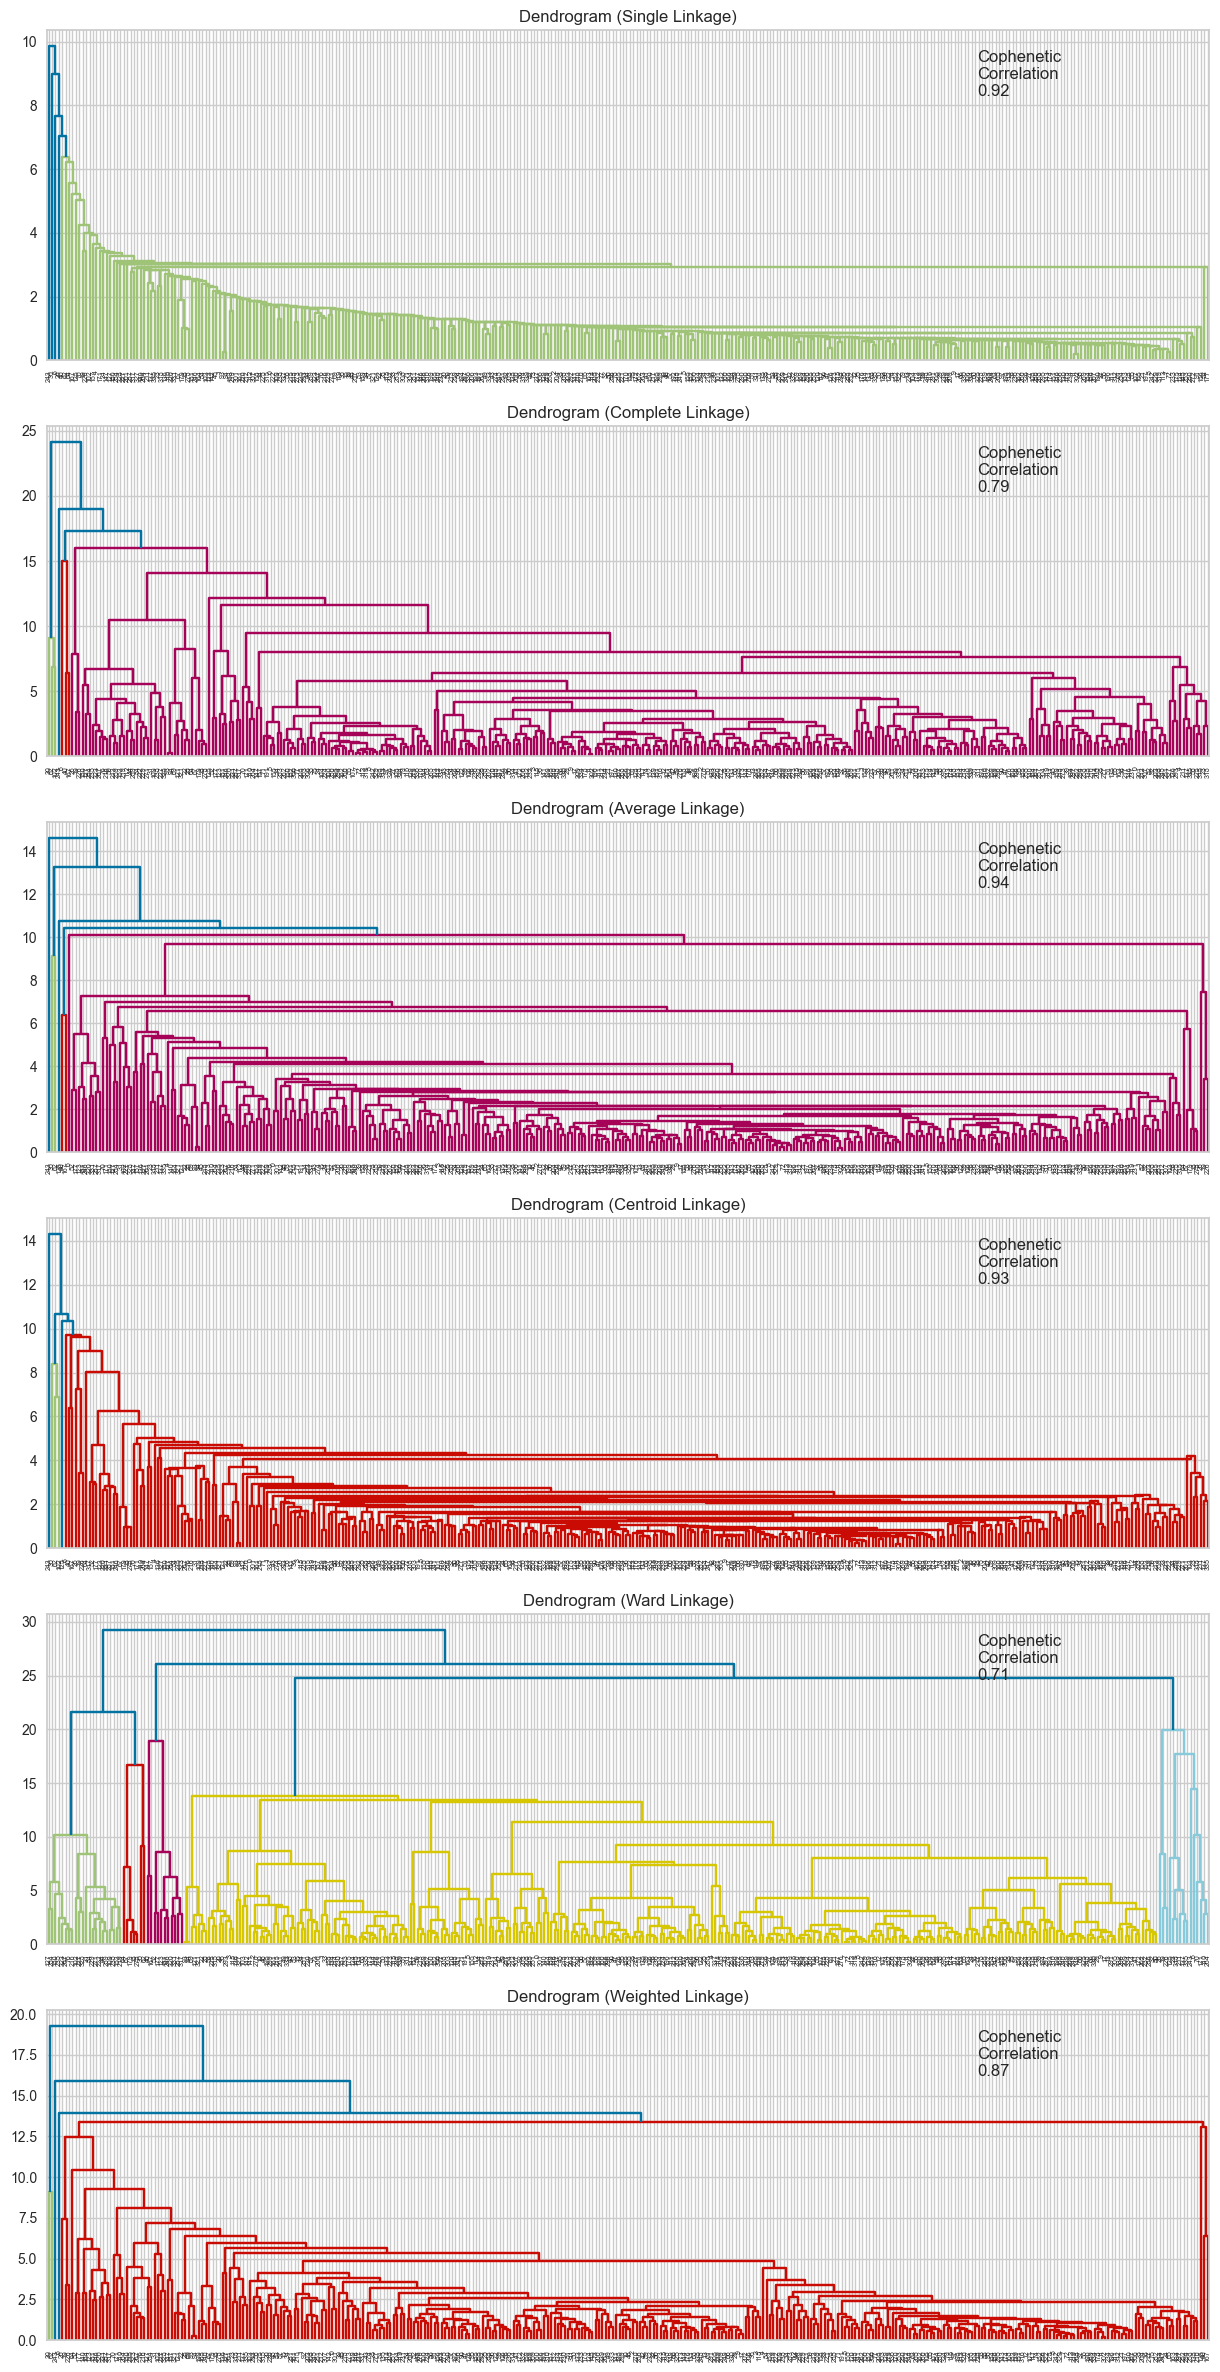

In [49]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

#### Observations

* The dendeogram or Ward Linkage shows distinct, separate clusters.

In [50]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.710118
1,complete,0.787328
5,weighted,0.869378
0,single,0.923227
3,centroid,0.931401
2,average,0.942254


#### Observations

* The cophenetic coefficient is highest for Eucledian distance with average linkage. However, the dendogram for Ward showed the most distint clusters.
* We will move forward with 7 clusters as shown in the Ward Linkage dendogram, Euclidean Distance, and Ward linkage to maximize distinct, unique clusters. 

In [51]:
## code to define the hierarchical clustering model
HCmodel = AgglomerativeClustering(n_clusters=7, affinity="euclidean", linkage="ward")  
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=7)

In [52]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

In [53]:
# Select numerical columns from df2
numeric_columns = df2.select_dtypes(include=[np.number])

# Compute the mean of each numeric column for each HC segment
hc_cluster_profile = numeric_columns.groupby("HC_segments").mean()

# Count the number of observations in each HC segment and add it to hc_cluster_profile
hc_cluster_profile["count_in_each_segment"] = df2.groupby("HC_segments")["Security"].count().values

# Apply style formatting to highlight the maximum values in each column
hc_cluster_profile.style.highlight_max(color="red", axis=0)


,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,325.996105,7.724708,1.545762,17.000000,360.333333,186503166.666667,1008736416.666667,9.544167,589434517.801667,41.121871,25.258283,12
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,7
2,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,285
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,22
5,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3
6,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2


In [57]:
## Print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Lim

In [58]:
# Group the data by HC_segments and GICS Sector, and count the number of occurrences of Security in each group
group_counts = df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

# Print the count of Security for each combination of HC_segments and GICS Sector
print(group_counts)


HC_segments  GICS Sector                
0            Consumer Discretionary          2
             Consumer Staples                1
             Health Care                     4
             Information Technology          3
             Real Estate                     1
             Telecommunications Services     1
1            Consumer Discretionary          1
             Consumer Staples                2
             Energy                          2
             Financials                      1
             Industrials                     1
2            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     1
             Telecommunications Services     2
3            Consumer Discretionary         35
             Consumer Staples               15
             Energy                          7
             Financ

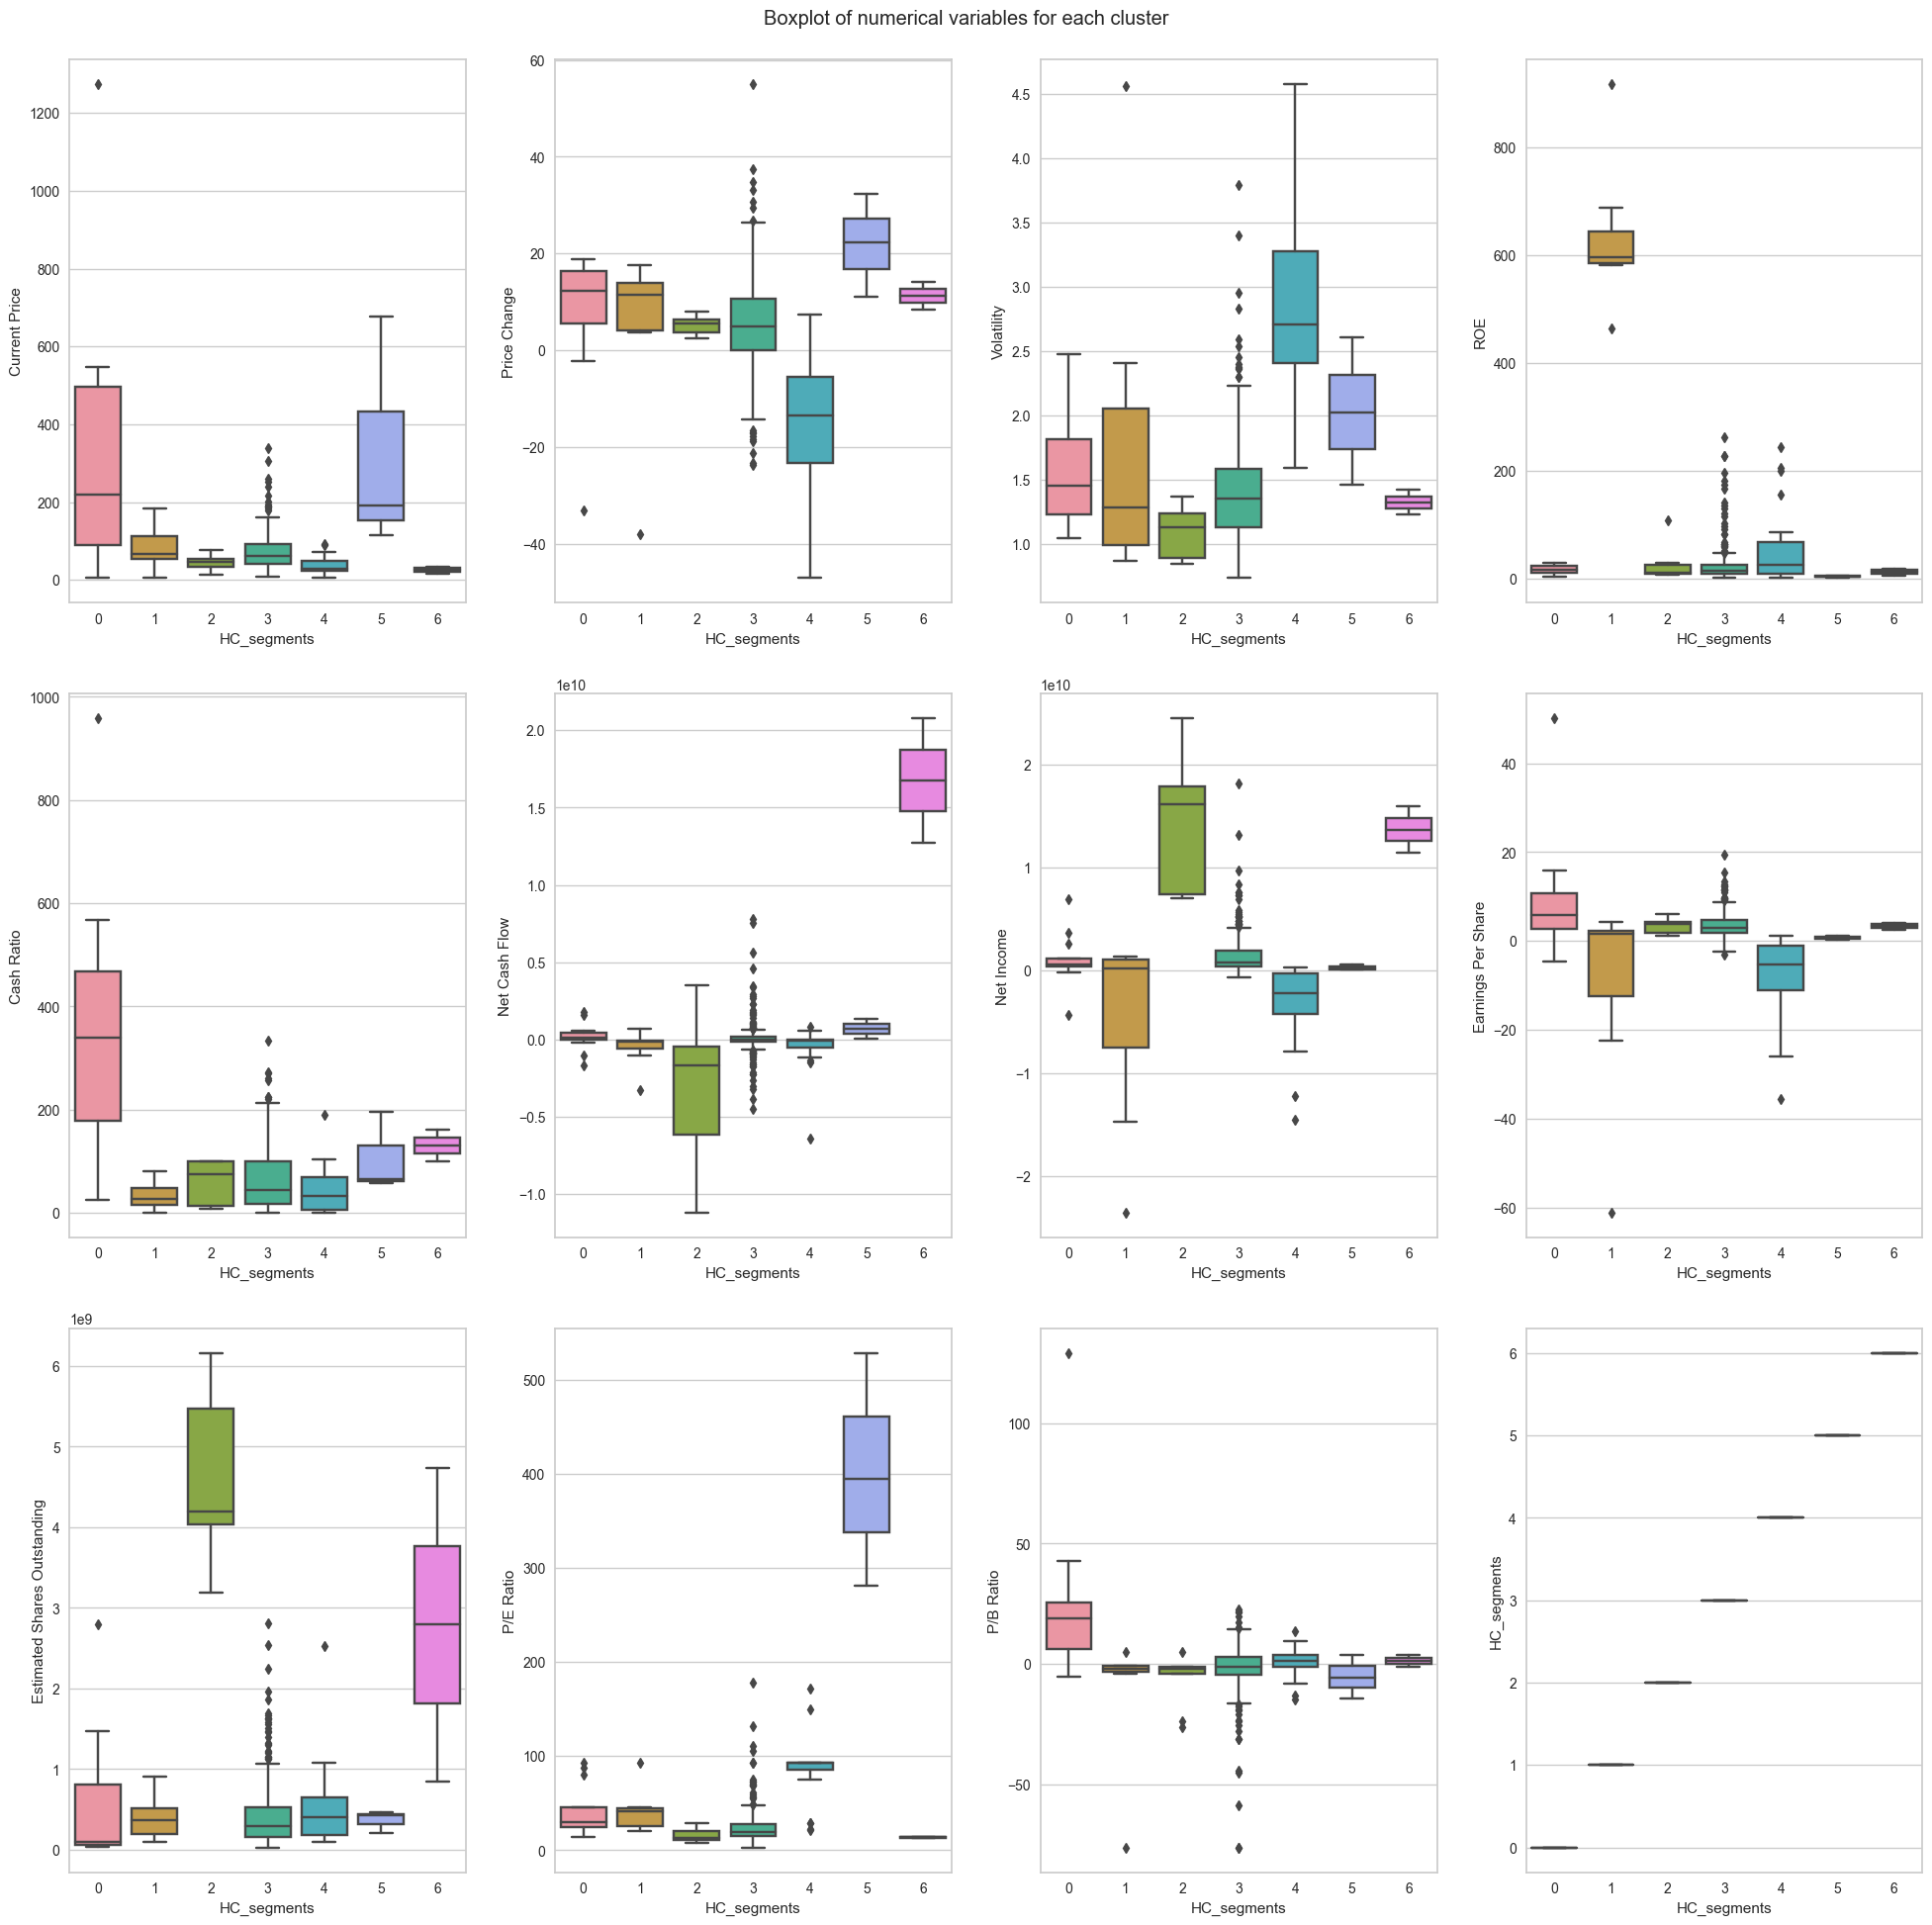

In [56]:
# Define the numerical columns
num_col = df2.select_dtypes(include=[np.number]).columns

# Set the figure size and title
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# Plot boxplots for each numerical variable
for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

# Adjust the layout
plt.tight_layout(pad=2.0)


#### Observations 

Cluster 0
* Custer 0 has 12 companies with max values in the Cash Ratio, Earnings Per Share, and P/B Ratio columns. 
* This cluster features moderate to high stock prices, moderate volatility and ROE, high cash ratio, postive net cash flow, and positive net income. 
* The high Cash Ratio indicates good investment potential for the companiesm, while the high Earnings Per Share indicates the companies are earning significant profits on shares. The comapnies in Cluster 0 are largely profitable and have growth potential and market confidence. 
* The high P/B Ratio indicates investors value the companies' stocks. It can also be an indicator of growth and market perceptions.

Cluster 1
* Cluster 1 has 7 companies with a max value in the ROE column. 
* This cluster featured low stock prices, high volatitlty and negative earnings per share. However, it had the max ROE but negative cash flow and net income, suggesting financial challenges. 
* Cluster 1 has a negative P/B Ratio, indicating the companies' shares are valued lower than book value. Together, the P/E and P/B Ratios indicate limited markety confidence in the earnings potentials of the comapnies in Cluster 1. 

Cluster 2
* Cluster 2 has 9 companies with max values in the Net Income and Estimated Shares Oustanding columns. 
* This cluster features moderate stock prices with low volatility and moderate equity return. 
* It has a high cash ratio but negative net cash flow and P/B Ratio, signifying finanical challenges and underevaluation. 
* In stark contrast, the cluster's max Net Income Value coupled with the max Estimated Share Oustanding value signifies high growth potential, significant earnings, and market confidence. High ESO can also go too far, raising dilution concerns effecting Net Income and profitability in future quarters. 

Cluster 3
* Custer 3 has the max companies at 285. 
* This cluster features moderate stock prices and volatility and decent equity return. 
* It has a high cash ratio, positive net cash flow, and net income. 
* Overall, the companies in cluster three are stable with a balanced market valuation. 

Cluster 4
* Cluster 4 has 22 companies and a max value in the volatility category and 20 companies in the Energy sector. 
* The cluster features lower stockj prices, high volatility, and high ROE. 
* It has negative net cash flow and net income, indicating current challenges. 
* However, the cluster has a high P/E Ration, signifying investors value the companies. 
* This isn't surprising considering the voloatility of the Enery Sector. It is often a favorite among investors but known to change on a whim with the state of global affairs. 

Cluster 5
* Cluster 5 only has 3 comapnies but max favlues in Current Price, Price Change, and P/E Ratio. 
* This cluster represents Amazon, Netflix, and Alexion Pharmaceuticals, with Amazon being among the Top 10 largest companies in the world. 
* It is not surprising this cluster represents the largest Current Price or P/E Ratio. Big companies pulling in major revenue are highly valued by investors and stock prices are higher. 
* This cluster has moderate volatility and high cash ratio but low ROE. 
* it also has low net invome and earnings per share, suggesting lower profatability. 
* The high P/E Ratio indcates an overvalued marketing sentiment. It signifies investors are willing to pay a higher price because of growth expectations. However, overpriced stocks hit a threshold, correct, and decline in value again. 

Cluster 6
* Clsuter 6 only has 2 companies with a max Net Cash Flow value. It represents Bank of America and Intel, so the high Net Cash Flow isn't surprising. 
* This cluster features lower stock prices with moderate volatility and return on eqwuity. 
It has high cash ratio and positive net cash flow and net income, indicating stability. 
* Both P/E and P/B Ratios are moderate. 

## K-means vs Hierarchical Clustering

Which clustering technique took less time for execution?
* Both clustering methods had approximately the same execution time. 

Which clustering technique gave you more distinct clusters, or are they the same?
* The Sillhouette Plot for the K-means clustering technique showed 6 clusters to be optial for the 340 samples. The dendogram for the Hierarchical clustering technique showed the most distinct clusters using Euchilidean distance and Ward Linkage. The dendogram further showed approximatel 7 clusters to be appropriate. 

How many observations are there in the similar clusters of both algorithms?
* Both techniques gave a similar clustering split with one cluster from each technique having the majority of companies. Both technqiues require better tuning before Trade&Ahead can heavily rely on their results. 




## Actionable Insights and Recommendations



1. Fine tuning the clustering techniques can help Trade&Ahead perform rish management. Clustering stocks and their assets by their risk characteristics will help Trade&Ahead identify similar risk profiles. This information helps create diversified portfolios, balancing risk across asset classes and sectors. Trade&Ahead would recommend one or more stocks from an identified high-risk cluster and one or more stocks from an identified low-risk cluster for diversification. Mixing assets allows Trade&Ahead to personalize the experience for their clients and adjust to achieve their desired risk level. 


2. Clutering techniques can help Trade&Ahead allocate the assets of their clients. If clusters show one or more sectors or businesses consistently outperforming others, Trade&Ahead can recomment overweighting asset into sectors and companies within the overperforming clusters. The converse also holds true. If a cluster is exhibiting high volatility and poor performance, Trade&Ahead can use the information to suggest underweighting or avoiding allocating assets to companies in that cluster. 


3. Above all, clustering techniques further assist Trade&Ahead in performing portfolio diversification for their clients. Clusters containing assets with low correlations have lower risk, while those with higher correlations prove greater financial risks. Trade&Ahead could use these correlations as a form of forecasting, advising clients to invest in one or more low-risk and high-risk companies to protect some of their investments while hopefully making larger proftits at the same time. 


4. Clustering analysis allow Trade&Ahead to identify trends within sectors and adapts its clients proftolio strategies accordingly and rebalance. For example, the volatile nature of the Energy sector. As seen in both cluster analyses, the Energy sector shows high volatility and currently, high ROE, low stock prices, and negative price change. The Energy sector has a history of high volatility and profitability. It is highly linked to geopolitical events and tensions, regulatory changes, supply and demand, tech advancements, and macroeconomic conditions. Trade&Ahead could use this combined information to identify trends in the Energy Sector (and apply it to all other sectors) It would help to balance client porfolios, knowing when to stay in or get out of the sector based on these natural flucuations and prediticions based on the factors that affect it.    